Problem Statement and Dataset: https://drive.google.com/drive/folders/19utD66Zfb7WgtqWkKBrlBmBIse-ph8HI?usp=sharing <br>
Google Doc:
https://docs.google.com/document/d/1aUTecNW_sx84H295Q-e6aNb6SVCGR7aiarbUg9PmN20/edit#<br>
### Tasks:


*   Data Preprocessing
*   Data Visualisation (EDA)
*   Feature Engineering
*   Models



In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:

# Importing Dataset
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Train_data.csv"
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  ...  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  Feb-21  \
0       8  ...      12       8       8       8       8       8      14   
1       7  ...      16       7       7       7       7       7      13   
2       6  ...       8       6       6       6       6       6       6   
3      18  ...      82      78      38      18      22      28      36   
4     141  ...     468     216      75       6      30      66     141   

   Mar-21  Apr-21  May-21  
0      16       8      12  
1      43      13      43  
2       8      26       6  
3     352      58      18  
4     699     183      24  

[5 rows x 41 columns]

In [ ]:
cols1819 = ['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']
cols1920 = ['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
            'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']
cols2021 = ['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']

df['year1819'] = df[cols1819].sum(axis=1)
df['year1920'] = df[cols1920].sum(axis=1)
df['year2021'] = df[cols2021].sum(axis=1) 
df.head()

Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  ...  Nov-20  Dec-20  Jan-21  Feb-21  Mar-21  Apr-21  May-21  \
0       8  ...       8       8       8      14      16       8      12   
1       7  ...       7       7       7      13      43      13      43   
2       6  ...       6       6       6       6       8      26       6   
3      18  ...      18      22      28      36     352      58      18   
4     141  ...       6      30      66     141     699     183      24   

   year1819  year1920  year2021  
0       167       182       135  
1       537       609       359  
2        72        94       114  
3      1004      1026      1258  
4      3048      3096      4263  

[5 rows x 44 columns]

In [ ]:
df["sum"] = df.sum(axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  ...  Dec-20  Jan-21  Feb-21  Mar-21  Apr-21  May-21  year1819  \
0       8  ...       8       8      14      16       8      12       167   
1       7  ...       7       7      13      43      13      43       537   
2       6  ...       6       6       6       8      26       6        72   
3      18  ...      22      28      36     352      58      18      1004   
4     141  ...      30      66     141     699     183      24      3048   

   year1920  year2021    sum  
0       182       135    968  
1       609       359   3010  
2        94       114    560  
3      1026      1258   6576  
4      3096      4263  20814  

[5 rows x 45 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Warehouse id  1039 non-null   object
 1   Region        1039 non-null   object
 2   SKU id        1039 non-null   object
 3   Apr-18        1039 non-null   int64 
 4   May-18        1039 non-null   int64 
 5   Jun-18        1039 non-null   int64 
 6   Jul-18        1039 non-null   int64 
 7   Aug-18        1039 non-null   int64 
 8   Sep-18        1039 non-null   int64 
 9   Oct-18        1039 non-null   int64 
 10  Nov-18        1039 non-null   int64 
 11  Dec-18        1039 non-null   int64 
 12  Jan-19        1039 non-null   int64 
 13  Feb-19        1039 non-null   int64 
 14  Mar-19        1039 non-null   int64 
 15  Apr-19        1039 non-null   int64 
 16  May-19        1039 non-null   int64 
 17  Jun-19        1039 non-null   int64 
 18  Jul-19        1039 non-null   int64 
 19  Aug-19

In [ ]:
df.describe()

Apr-18       May-18       Jun-18       Jul-18       Aug-18  \
count   1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     248.102984   216.824832   209.153994   157.714148   174.883542   
std      785.750982   493.283000   480.078224   351.488015   450.706178   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%        9.000000     9.500000    10.000000    10.000000     9.000000   
50%       18.000000    19.000000    19.000000    18.000000    19.000000   
75%      191.000000   186.500000   192.500000   137.000000   128.000000   
max    17540.000000  5029.000000  5823.000000  3151.000000  6700.000000   

            Sep-18       Oct-18        Nov-18        Dec-18        Jan-19  \
count  1039.000000  1039.000000   1039.000000   1039.000000   1039.000000   
mean    158.524543   161.719923    201.784408    212.032724    177.205967   
std     374.631088   376.697992    614.940984    766.657455    790.932939   
min       1.000000     1.000000      1.000000      1.000000      1.000000   
25%      10.000000     9.000000     10.000000     10.000000     10.000000   
50%      19.000000    19.000000     19.000000     19.000000     20.000000   
75%     140.000000   127.500000    143.500000    170.000000    130.500000   
max    4604.000000  3576.000000  10322.000000  18336.000000  19324.000000   

       ...        Dec-20        Jan-21        Feb-21        Mar-21  \
count  ...   1039.000000   1039.000000   1039.000000   1039.000000   
mean   ...    388.457170    274.597690    275.120308    387.707411   
std    ...   1374.171617    805.756394    699.096181   1106.507945   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...     30.500000     22.500000     32.000000     43.000000   
50%    ...    106.000000     77.000000    105.000000    129.000000   
75%    ...    297.500000    218.500000    254.000000    339.500000   
max    ...  30996.000000  12020.000000  11641.000000  16483.000000   

            Apr-21       May-21       year1819       year1920       year2021  \
count  1039.000000  1039.000000    1039.000000    1039.000000    1039.000000   
mean    150.856593   122.123195    2447.695861    2704.565929    3084.451396   
std     420.741507   329.277995    6836.624909    7931.217446    7662.793234   
min       1.000000     1.000000      12.000000      12.000000      14.000000   
25%      18.000000    14.000000     144.000000     204.000000     487.000000   
50%      46.000000    33.000000     442.000000     660.000000    1103.000000   
75%     133.000000    92.000000    2137.000000    2339.000000    2701.000000   
max    9199.000000  4669.000000  142432.000000  149500.000000  122372.000000   

                 sum  
count    1039.000000  
mean    16473.426372  
std     42764.524239  
min        76.000000  
25%      2144.000000  
50%      5268.000000  
75%     14920.000000  
max    786312.000000  

[8 rows x 42 columns]

In [ ]:
df.isnull().sum()

Warehouse id    0
Region          0
SKU id          0
Apr-18          0
May-18          0
Jun-18          0
Jul-18          0
Aug-18          0
Sep-18          0
Oct-18          0
Nov-18          0
Dec-18          0
Jan-19          0
Feb-19          0
Mar-19          0
Apr-19          0
May-19          0
Jun-19          0
Jul-19          0
Aug-19          0
Sep-19          0
Oct-19          0
Nov-19          0
Dec-19          0
Jan-20          0
Feb-20          0
Mar-20          0
Apr-20          0
May-20          0
Jun-20          0
Jul-20          0
Aug-20          0
Sep-20          0
Oct-20          0
Nov-20          0
Dec-20          0
Jan-21          0
Feb-21          0
Mar-21          0
Apr-21          0
May-21          0
year1819        0
year1920        0
year2021        0
sum             0
dtype: int64

In [ ]:
df.columns

Index(['Warehouse id', 'Region', 'SKU id', 'Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19',
       'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19',
       'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
       'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21',
       'year1819', 'year1920', 'year2021', 'sum'],
      dtype='object')

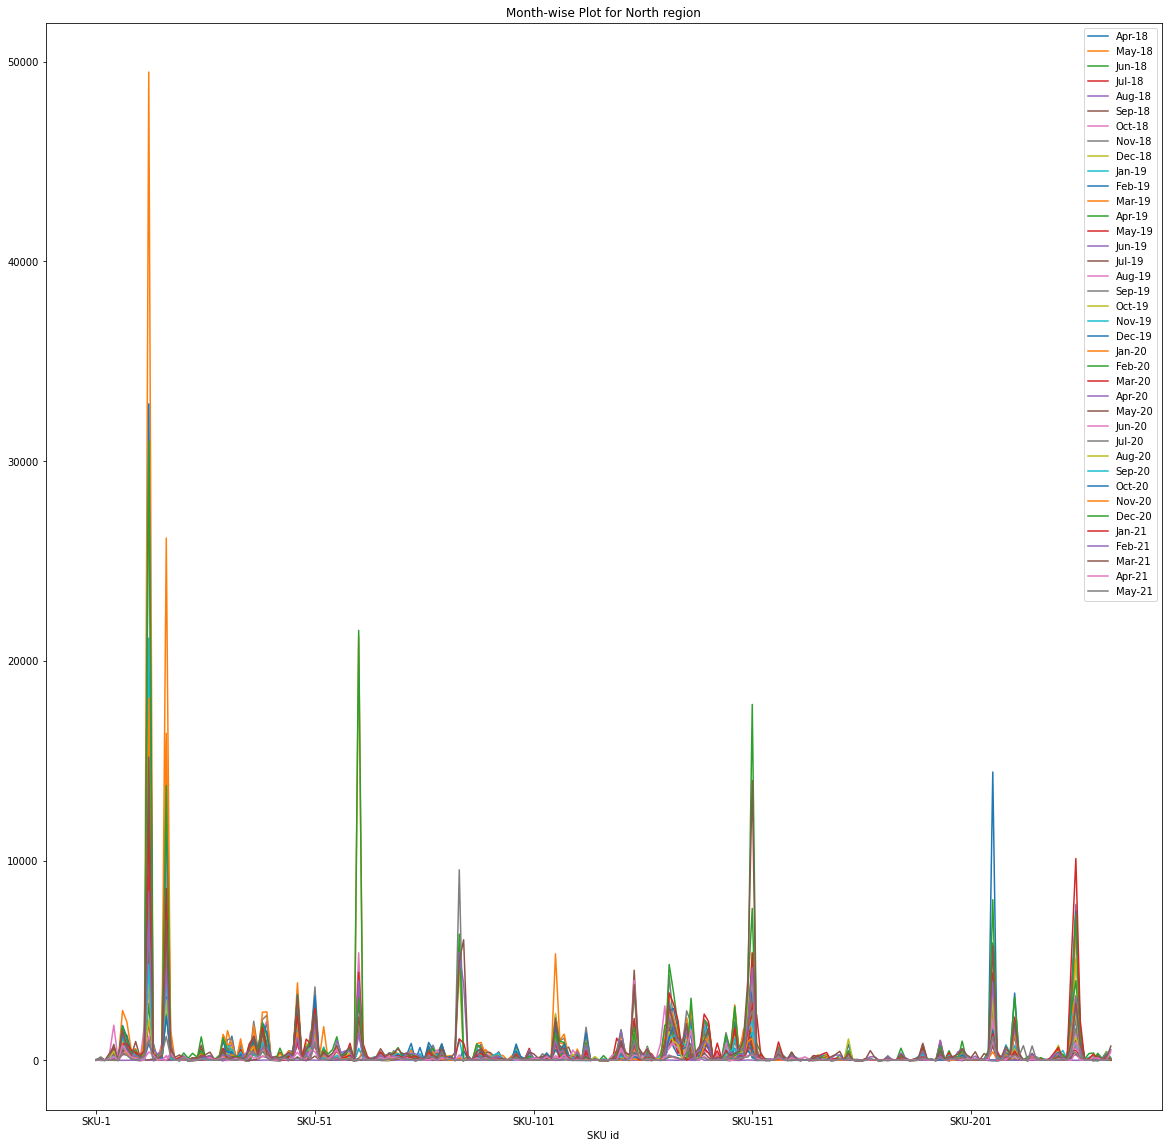

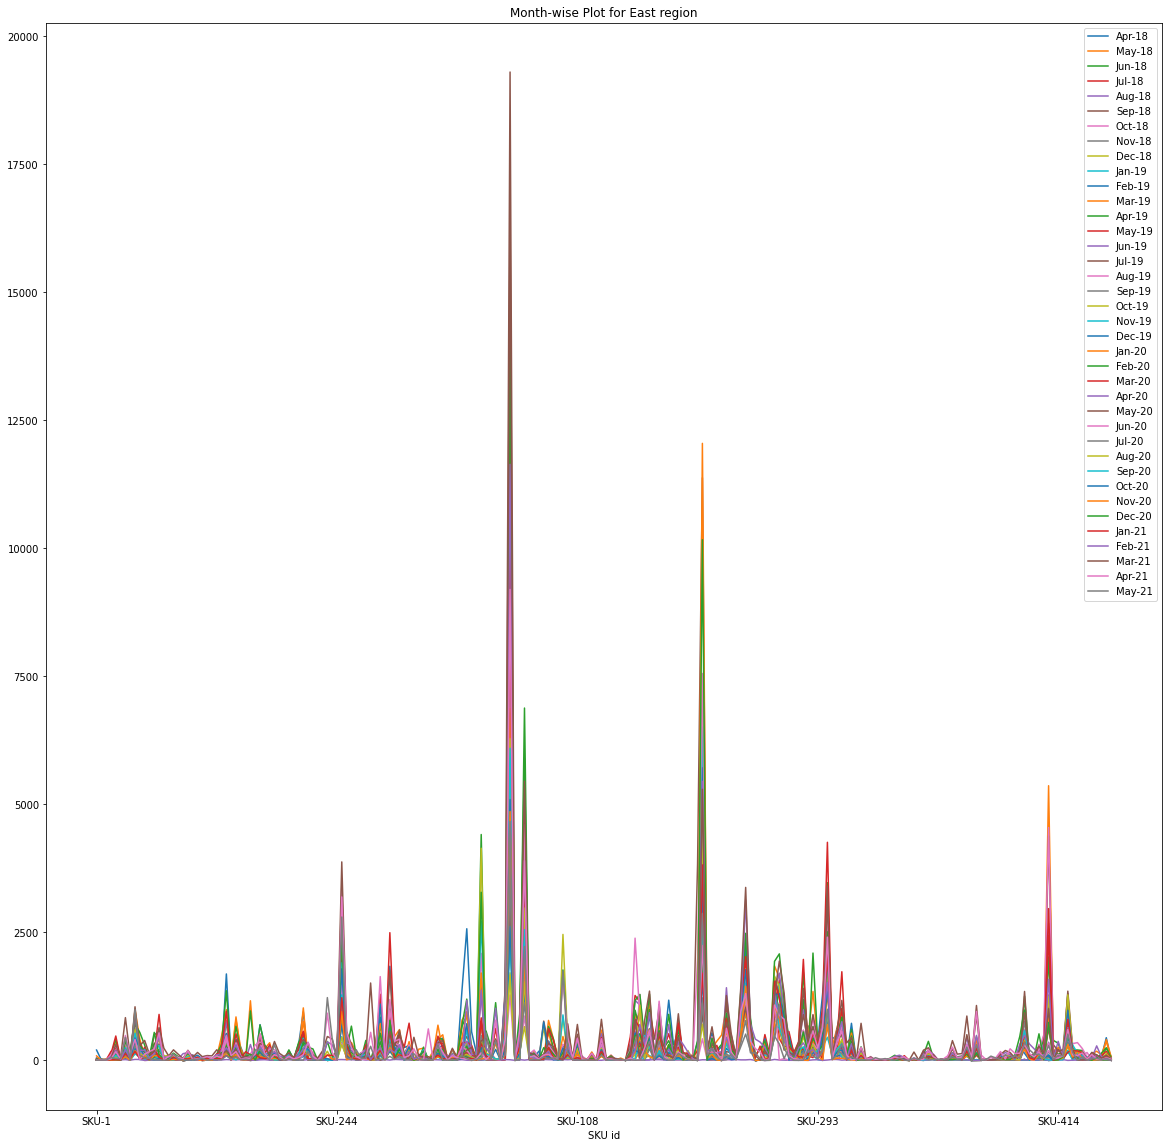

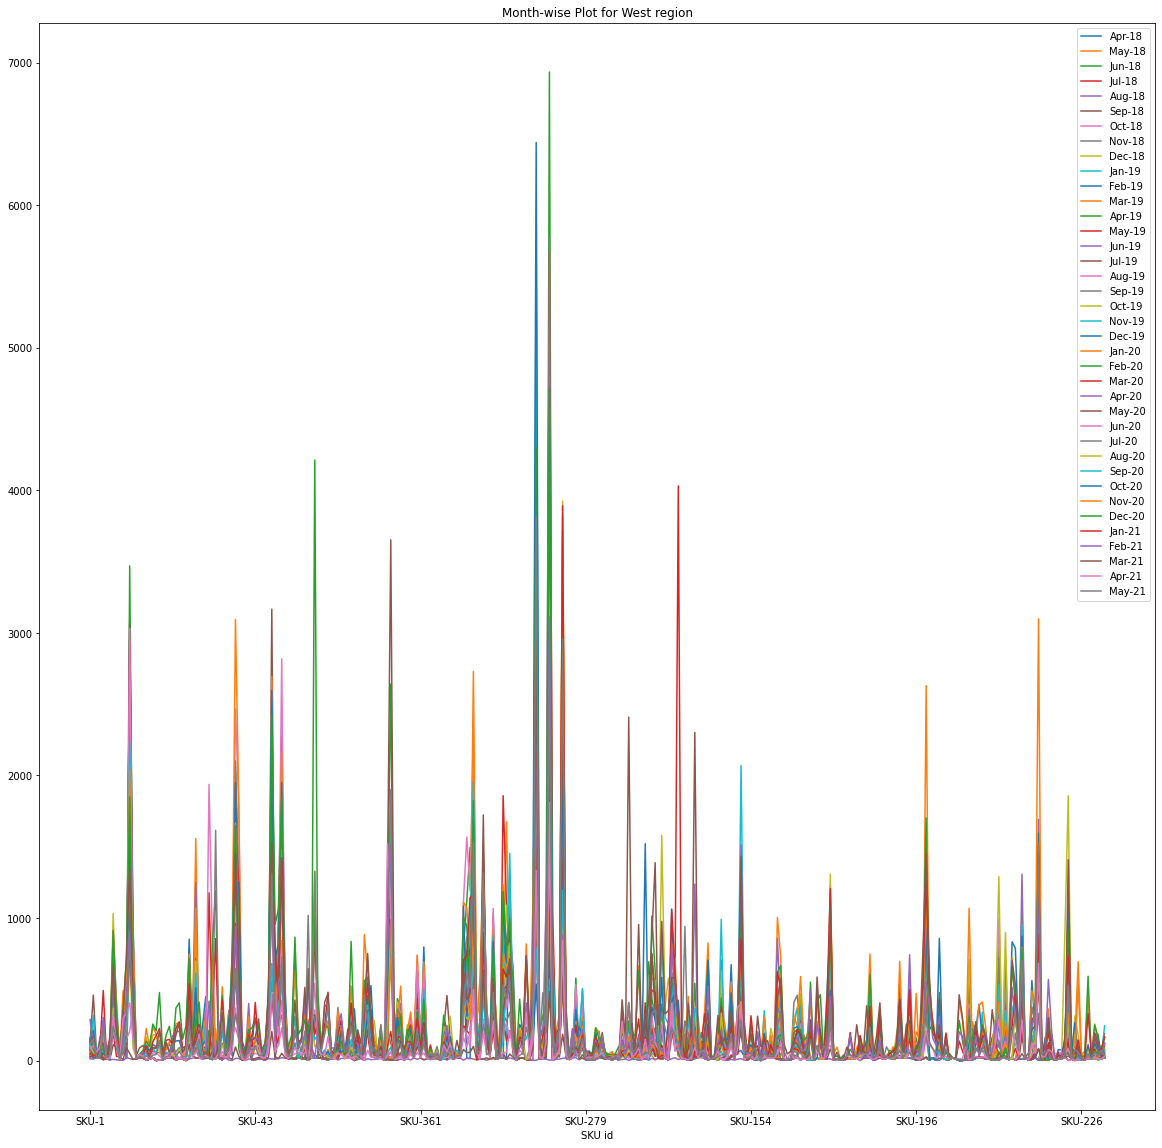

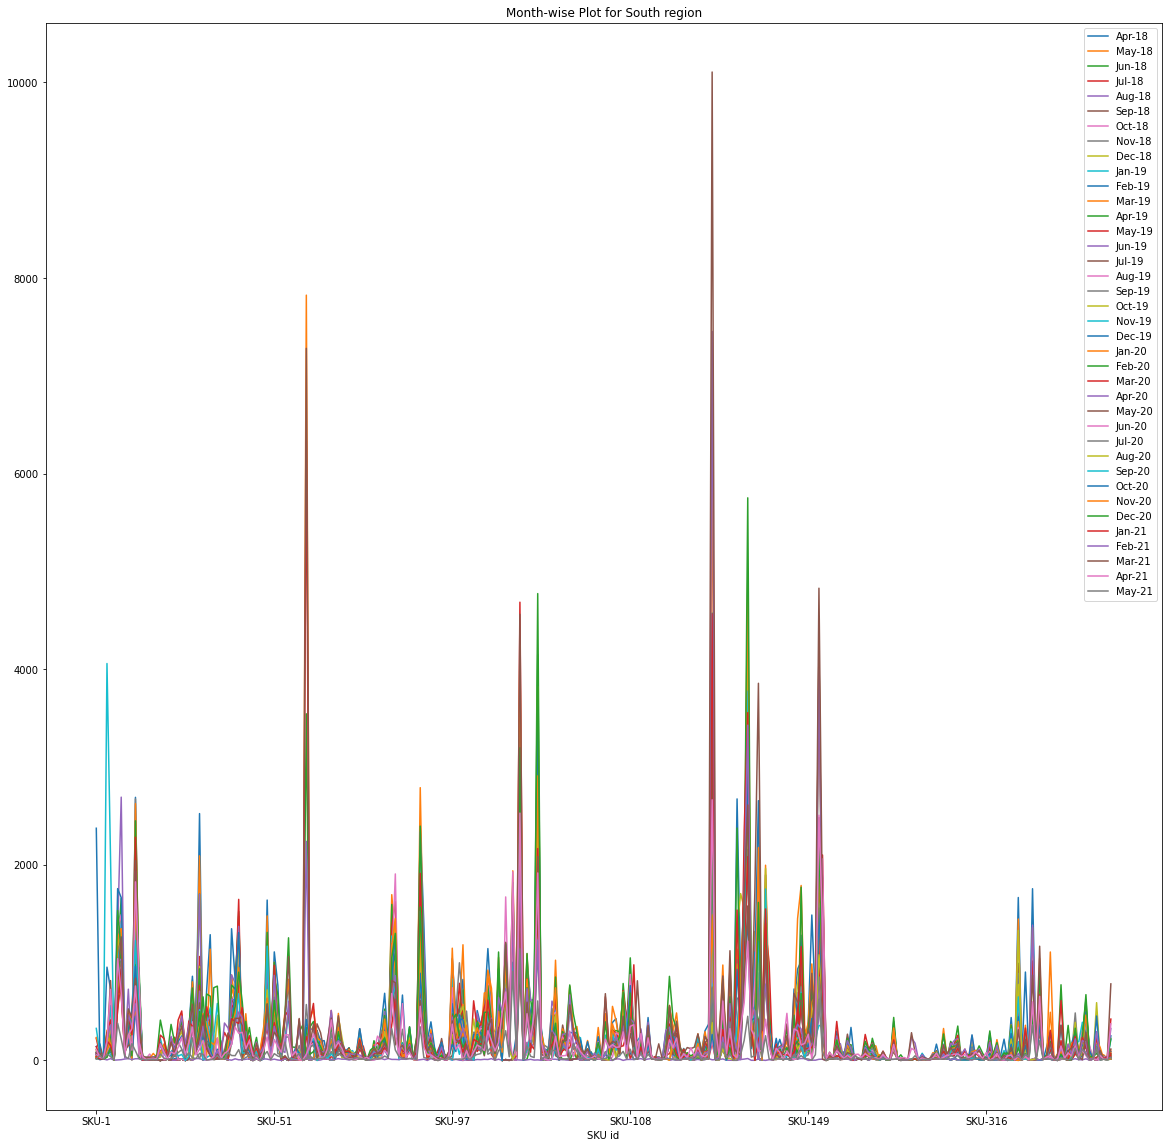

In [ ]:
df_N = df.where(df["Region"] == "NORTH")
df_N = df_N.dropna()
df_N.plot(x="SKU id",y=['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 
            'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 
            'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'],figsize=(20,20),title="Month-wise Plot for North region")

df_E = df.where(df["Region"] == "EAST")
df_E = df_E.dropna()
df_E.plot(x="SKU id",y=['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 
            'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 
            'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'],figsize=(20,20),title="Month-wise Plot for East region")

df_W = df.where(df["Region"] == "WEST")
df_W = df_W.dropna()
df_W.plot(x="SKU id",y=['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 
            'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 
            'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'],figsize=(20,20),title="Month-wise Plot for West region")

df_S = df.where(df["Region"] == "SOUTH")
df_S = df_S.dropna()
df_S.plot(x="SKU id",y=['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 
            'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 
            'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'],figsize=(20,20),title="Month-wise Plot for South region")

#for col in ['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
#            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 
#            'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 
#            'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
#            'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']:

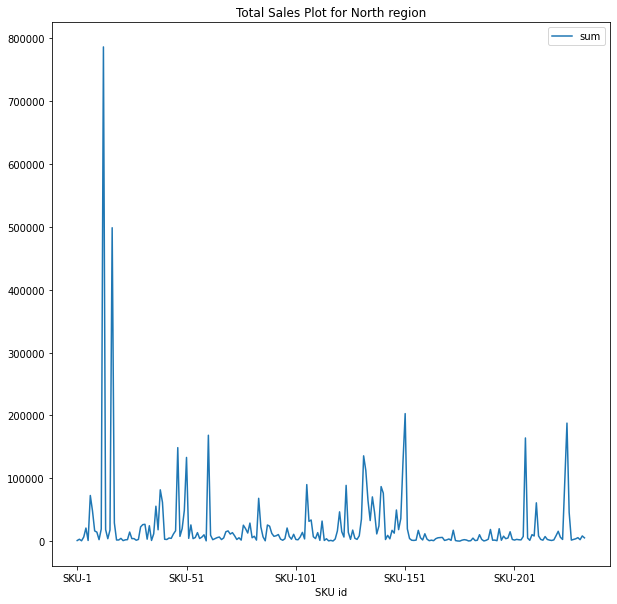

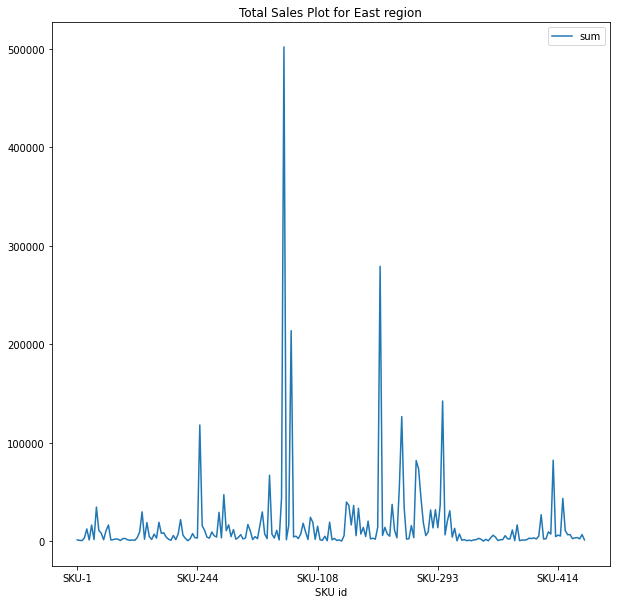

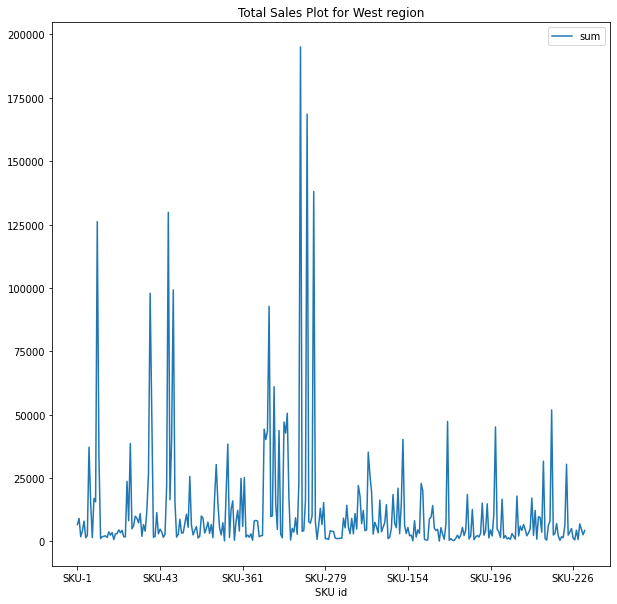

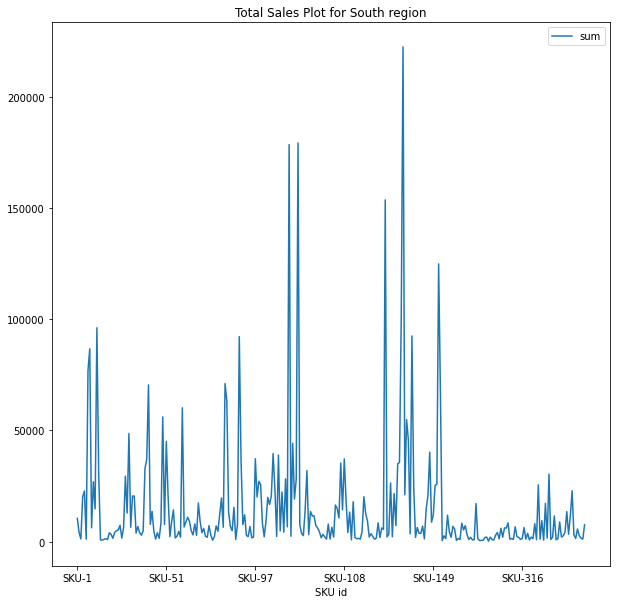

In [ ]:
df_N.plot(x="SKU id",y="sum",figsize=(10,10),title="Total Sales Plot for North region")
df_E.plot(x="SKU id",y="sum",figsize=(10,10),title="Total Sales Plot for East region")
df_W.plot(x="SKU id",y="sum",figsize=(10,10),title="Total Sales Plot for West region")
df_S.plot(x="SKU id",y="sum",figsize=(10,10),title="Total Sales Plot for South region")

SKU id  SKU-1  SKU-2  SKU-3  SKU-4  SKU-5  SKU-6   SKU-7  SKU-8  SKU-9  \
Apr-18   27.0   88.0    6.0  162.0  171.0    4.0  1179.0  406.0  264.0   
May-18   13.0   28.0    6.0  184.0  402.0    4.0   435.0  652.0  244.0   
Jun-18   30.0  127.0    6.0  110.0  627.0    4.0   335.0  844.0  159.0   
Jul-18   14.0  130.0    6.0  172.0  615.0   52.0   719.0  541.0  204.0   
Aug-18   22.0   58.0    6.0   90.0  300.0    4.0   791.0  703.0   84.0   

SKU id  SKU-10  ...  SKU-224  SKU-225  SKU-226  SKU-227  SKU-228  SKU-229  \
Apr-18     8.0  ...    101.0    817.0    308.0     17.0     17.0      4.0   
May-18     8.0  ...    365.0    669.0    224.0     17.0     17.0      4.0   
Jun-18     8.0  ...    821.0   1577.0    484.0     17.0     17.0      4.0   
Jul-18     8.0  ...    221.0    321.0     69.0     17.0     17.0      4.0   
Aug-18     8.0  ...    261.0    325.0    210.0     17.0     17.0      4.0   

SKU id  SKU-230  SKU-231  SKU-232  SKU-233  
Apr-18    253.0     26.0    297.0     91.0  
May-18    298.0     92.0    151.0     31.0  
Jun-18    355.0     98.0    449.0    114.0  
Jul-18    190.0     42.0    107.0     51.0  
Aug-18    127.0     50.0     67.0     21.0  

[5 rows x 233 columns]

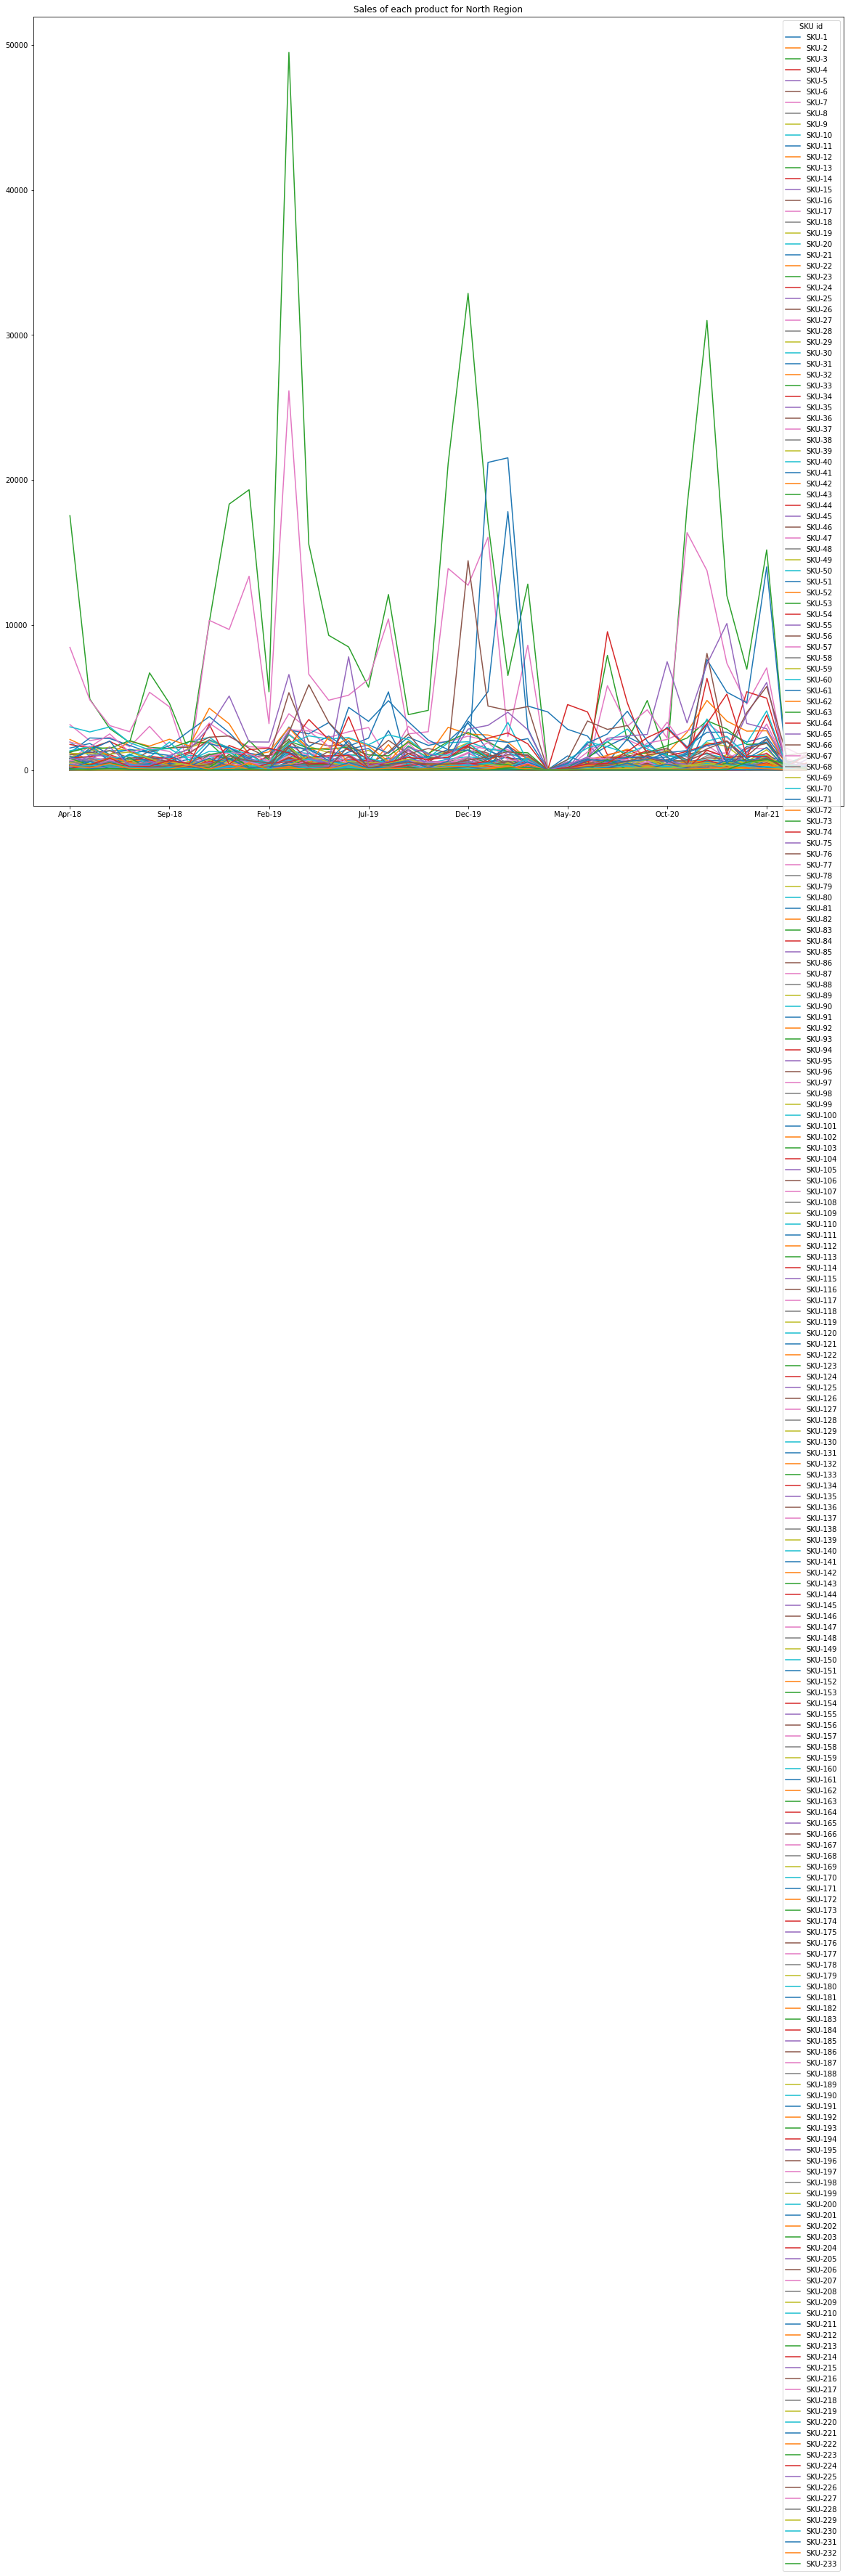

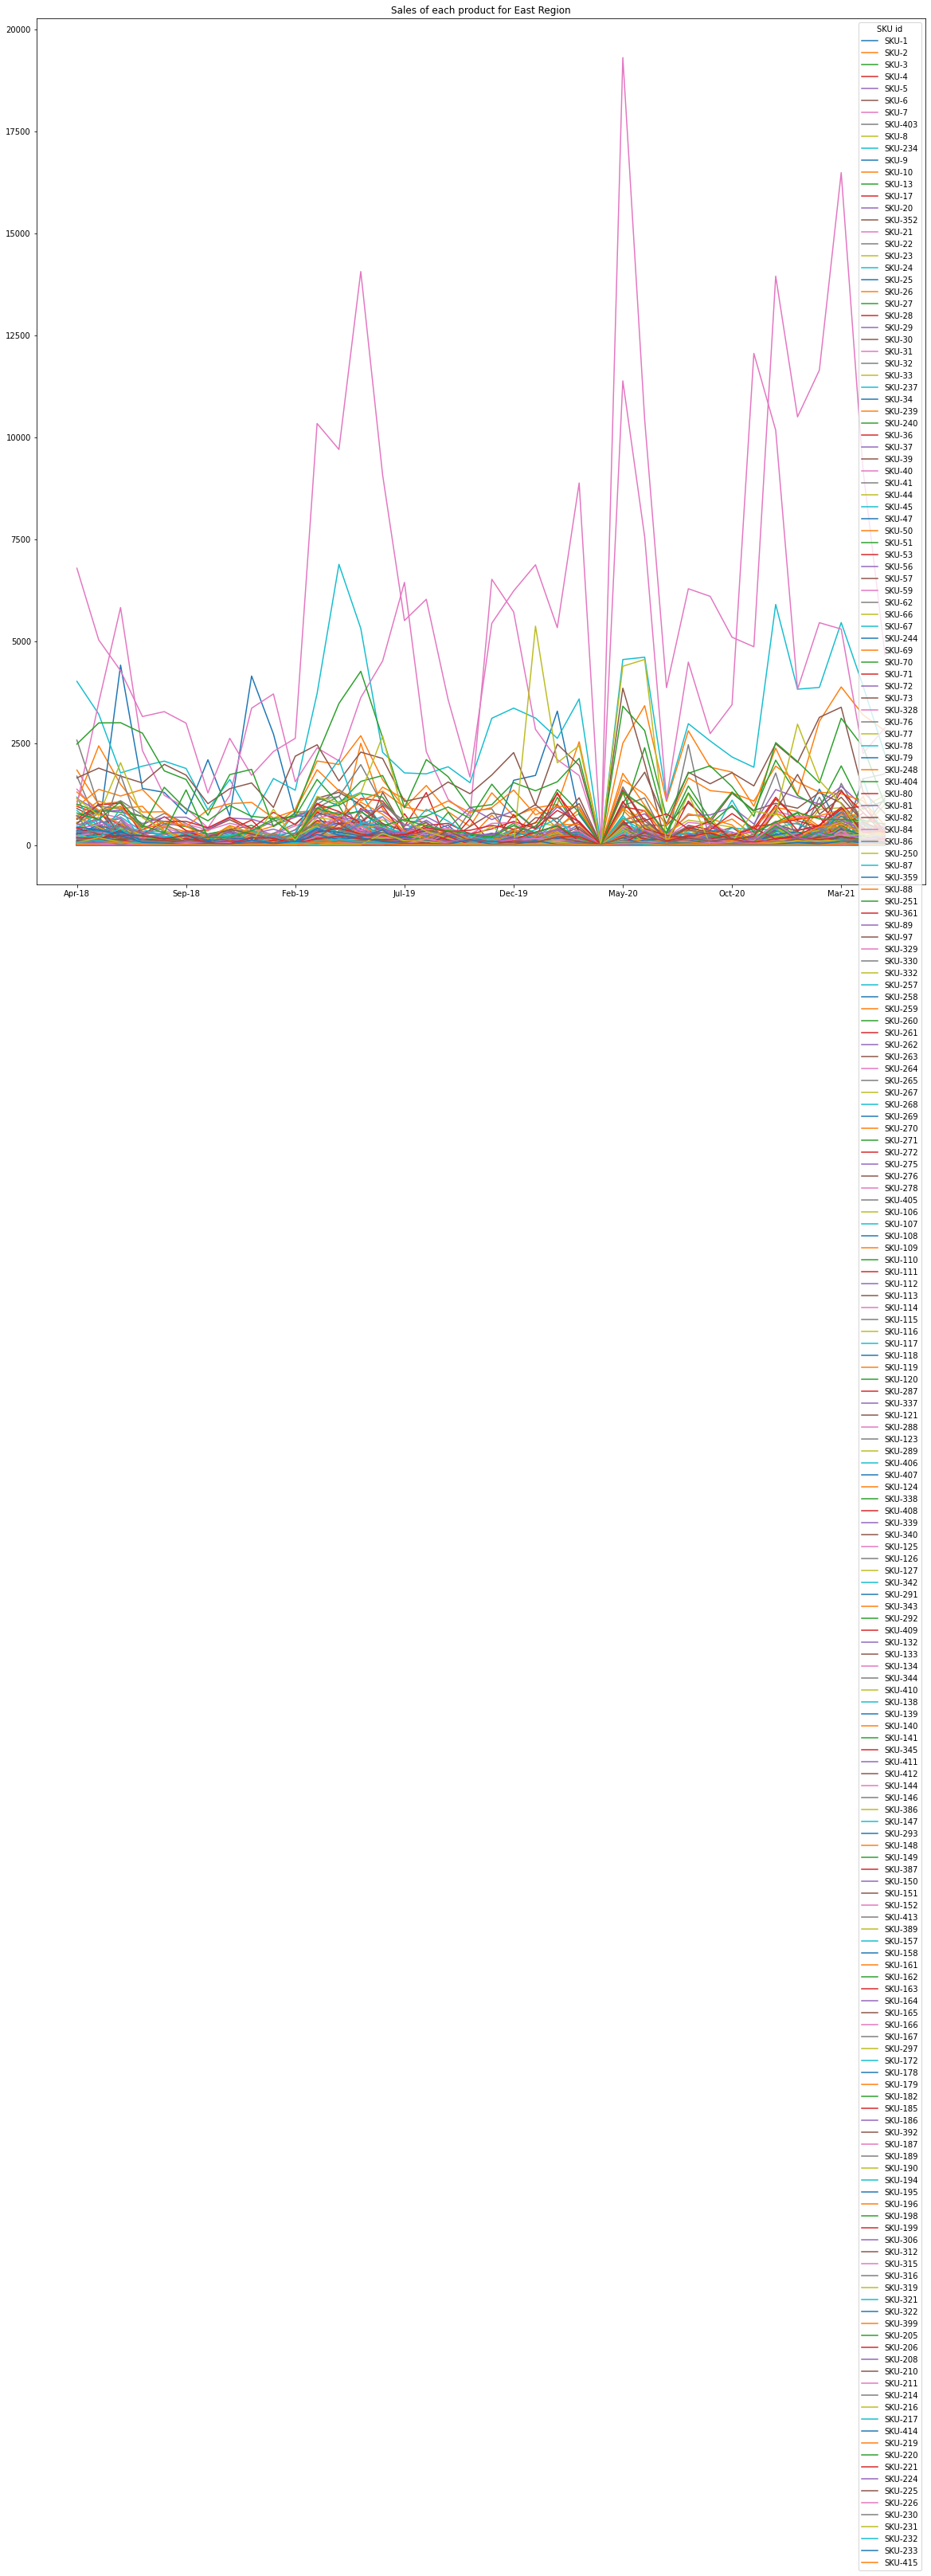

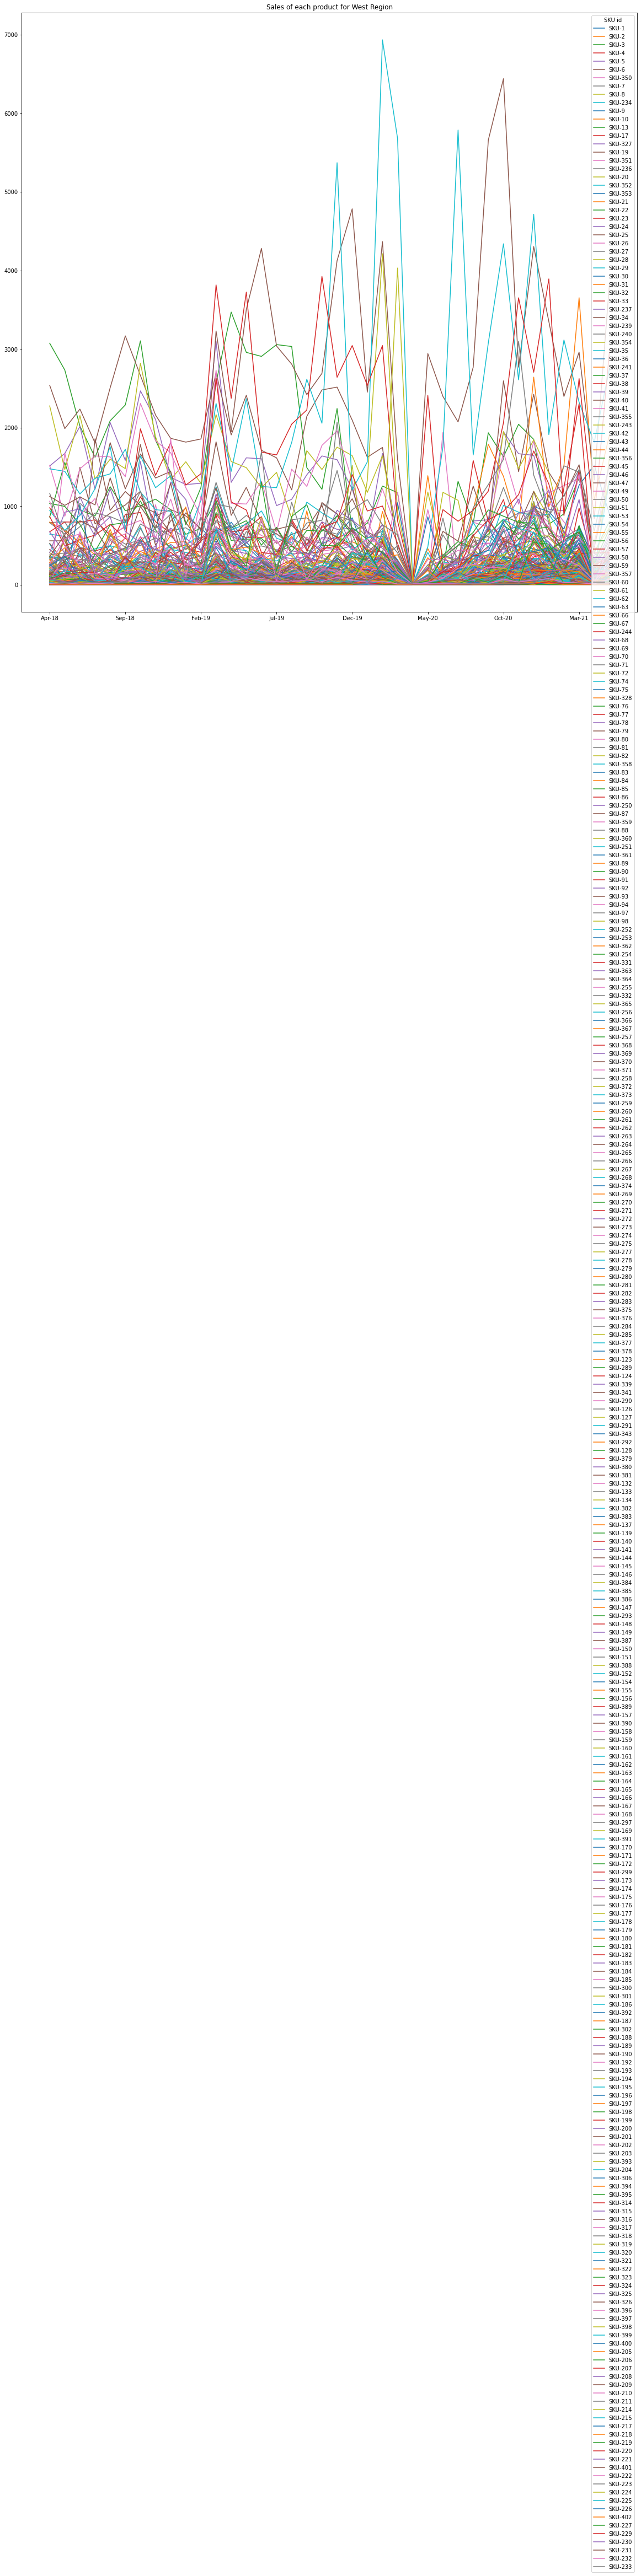

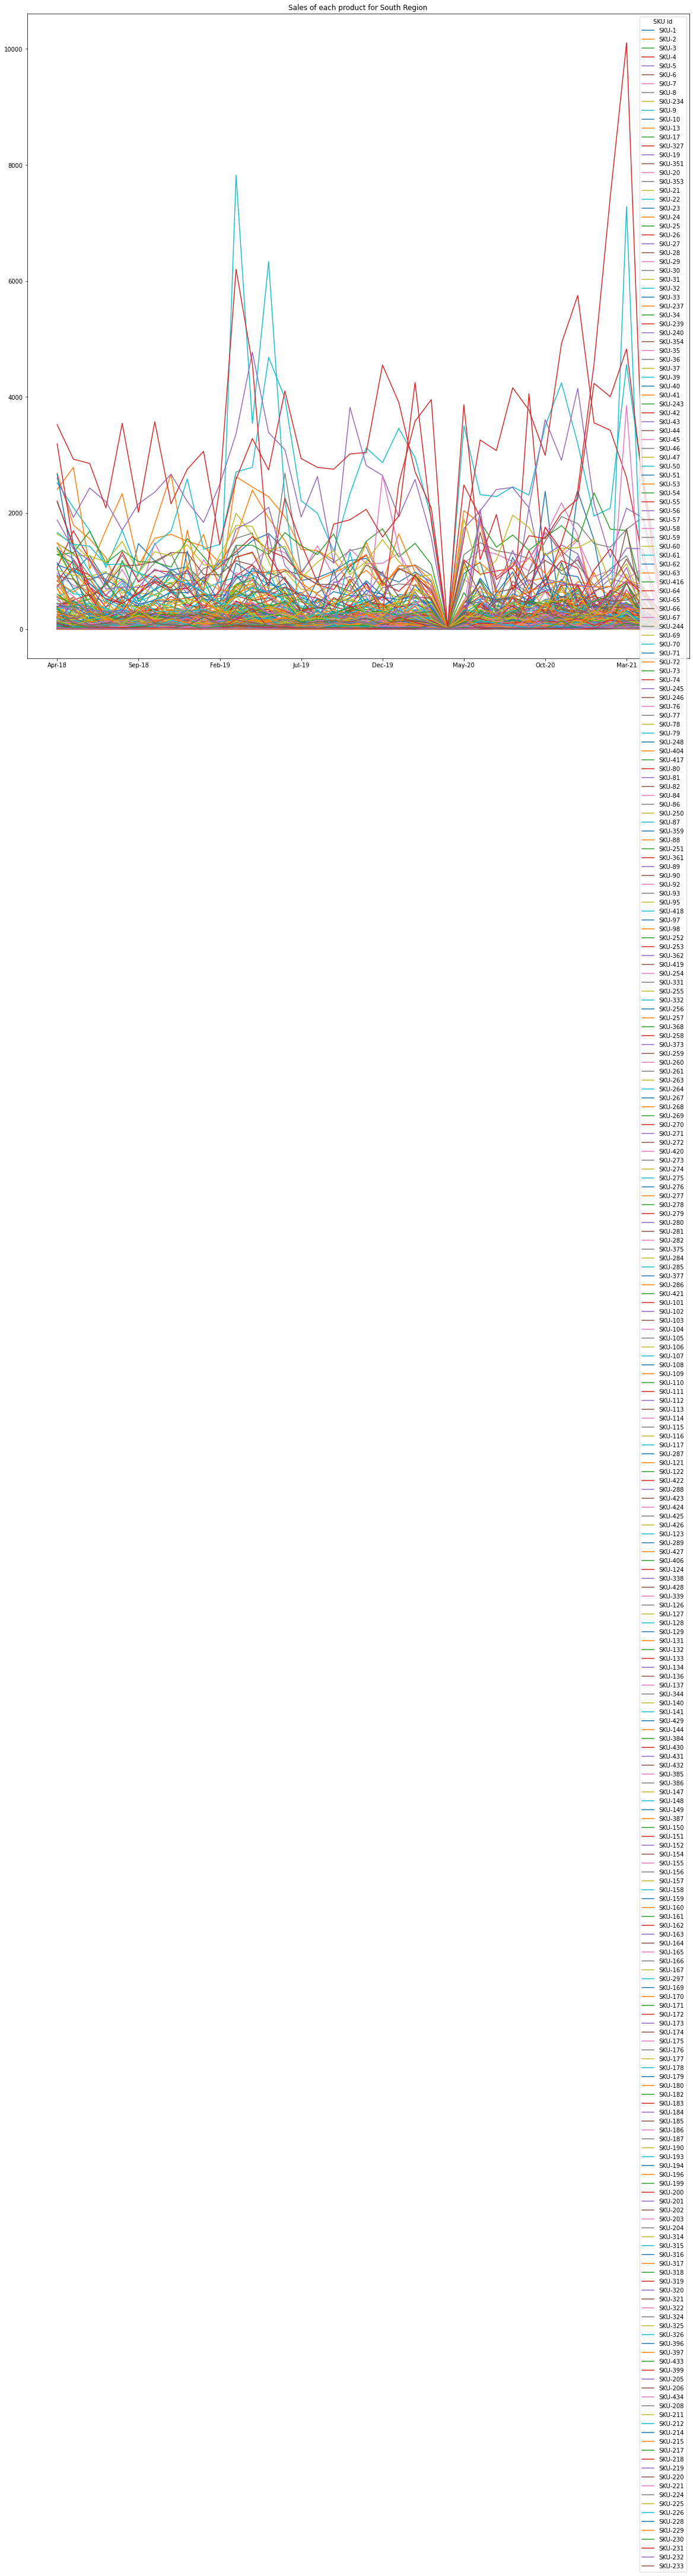

In [ ]:
df_N_T = df_N.set_index('SKU id')
df_N_T.drop(["Warehouse id", "Region"], axis = 1, inplace = True)
df_N_T = df_N_T.T
df_N_T.drop(['sum','year1819','year1920','year2021'], inplace=True, axis=0)
df_N_T.plot(figsize=(20,20),title="Sales of each product for North Region")

df_E_T = df_E.set_index('SKU id')
df_E_T.drop(["Warehouse id", "Region"], axis = 1, inplace = True)
df_E_T = df_E_T.T
df_E_T.drop(['sum','year1819','year1920','year2021'], inplace=True, axis=0)
df_E_T.plot(figsize=(20,20),title="Sales of each product for East Region")

df_W_T = df_W.set_index('SKU id')
df_W_T.drop(["Warehouse id", "Region"], axis = 1, inplace = True)
df_W_T = df_W_T.T
df_W_T.drop(['sum','year1819','year1920','year2021'], inplace=True, axis=0)
df_W_T.plot(figsize=(20,20),title="Sales of each product for West Region")

df_S_T = df_S.set_index('SKU id')
df_S_T.drop(["Warehouse id", "Region"], axis = 1, inplace = True)
df_S_T = df_S_T.T
df_S_T.drop(['sum','year1819','year1920','year2021'], inplace=True, axis=0)
df_S_T.plot(figsize=(20,20),title="Sales of each product for South Region")

df_N_T.head()

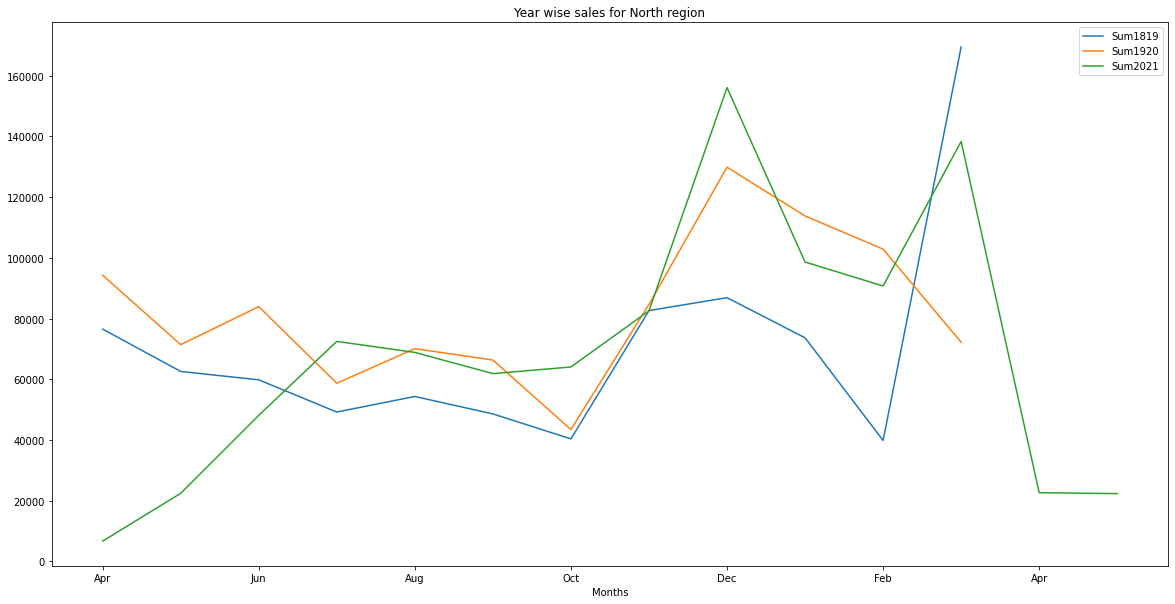

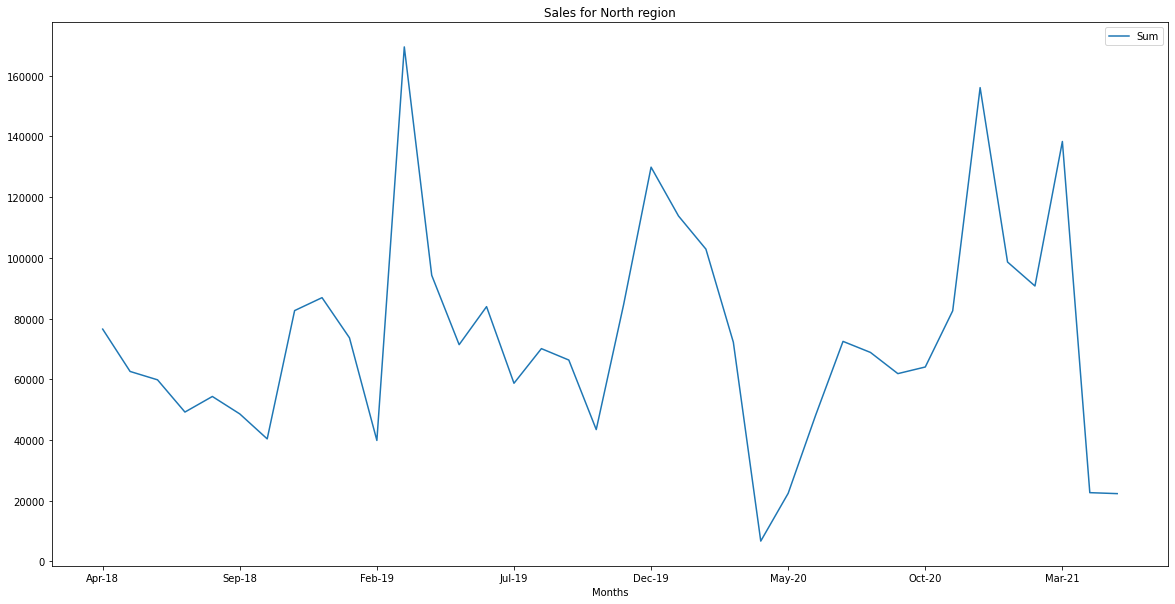

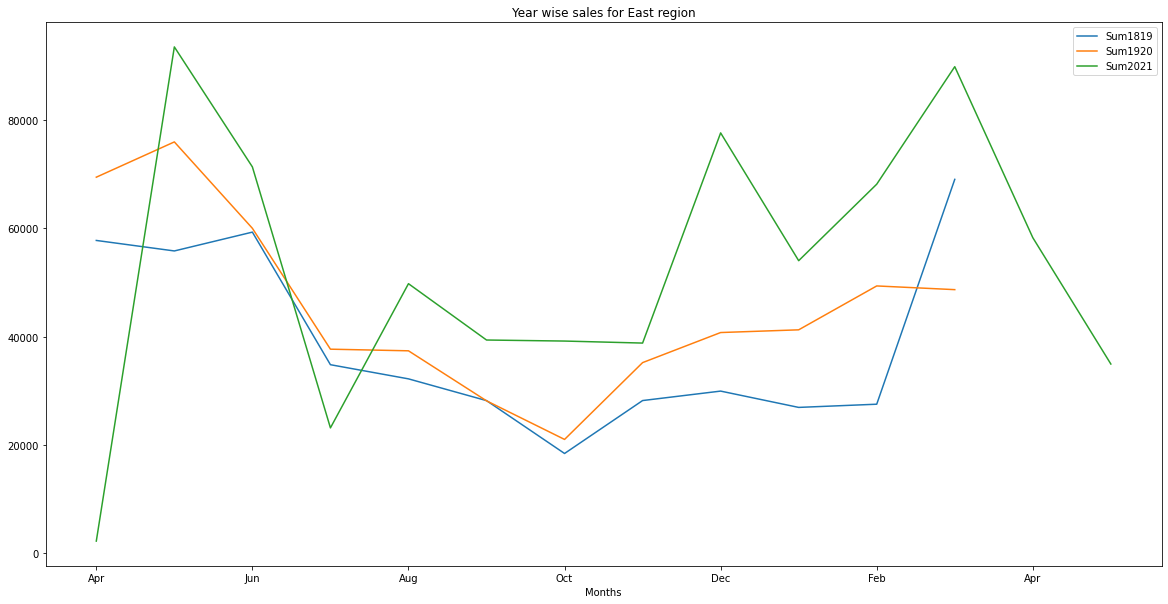

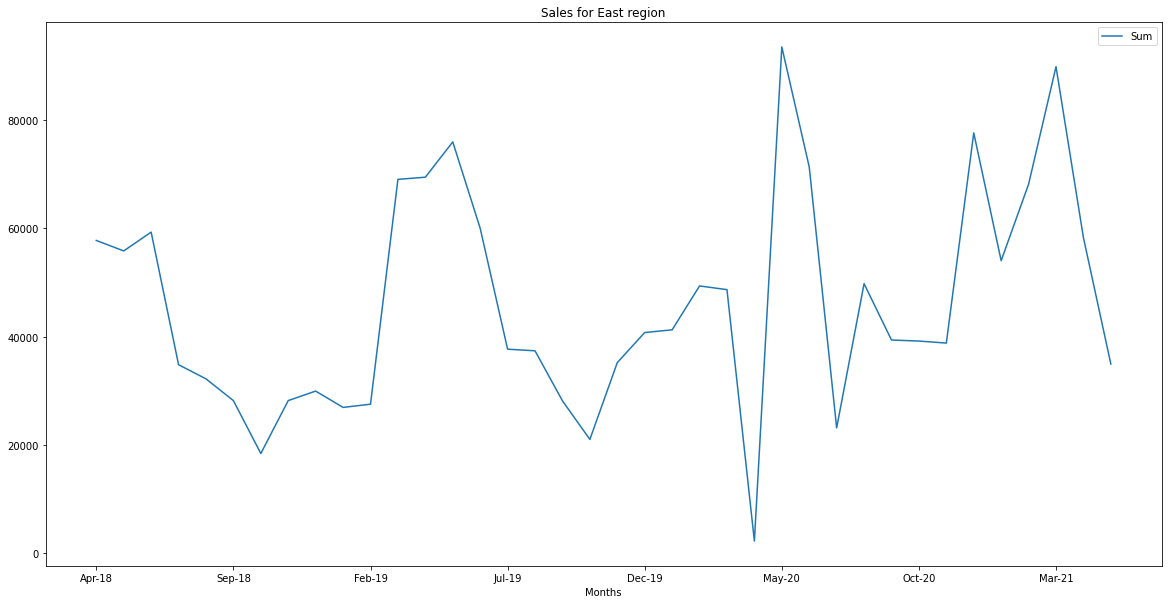

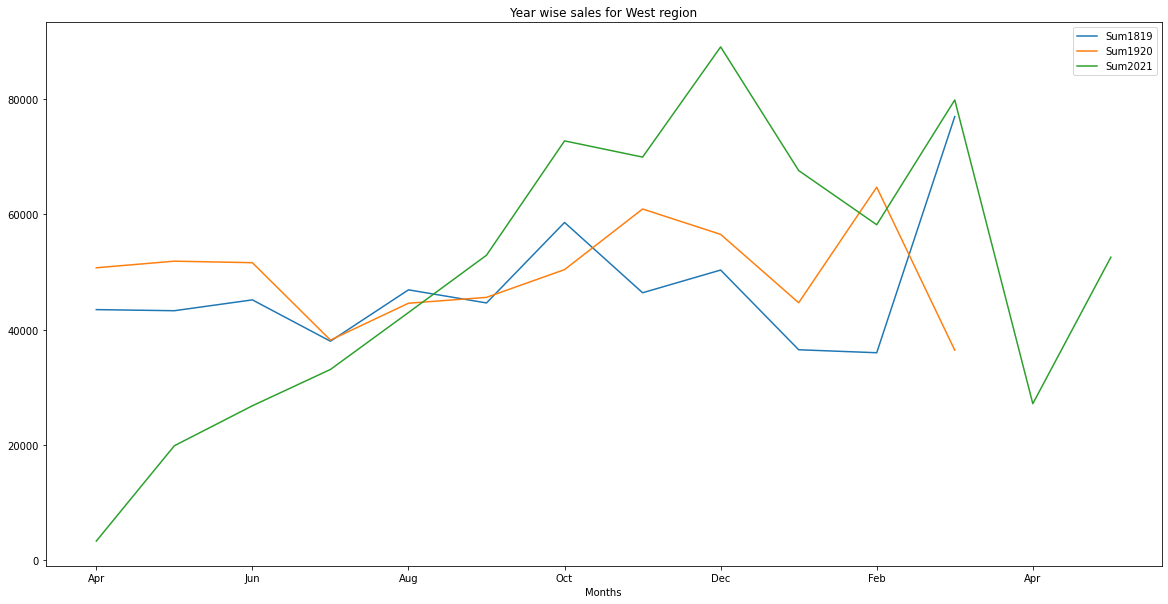

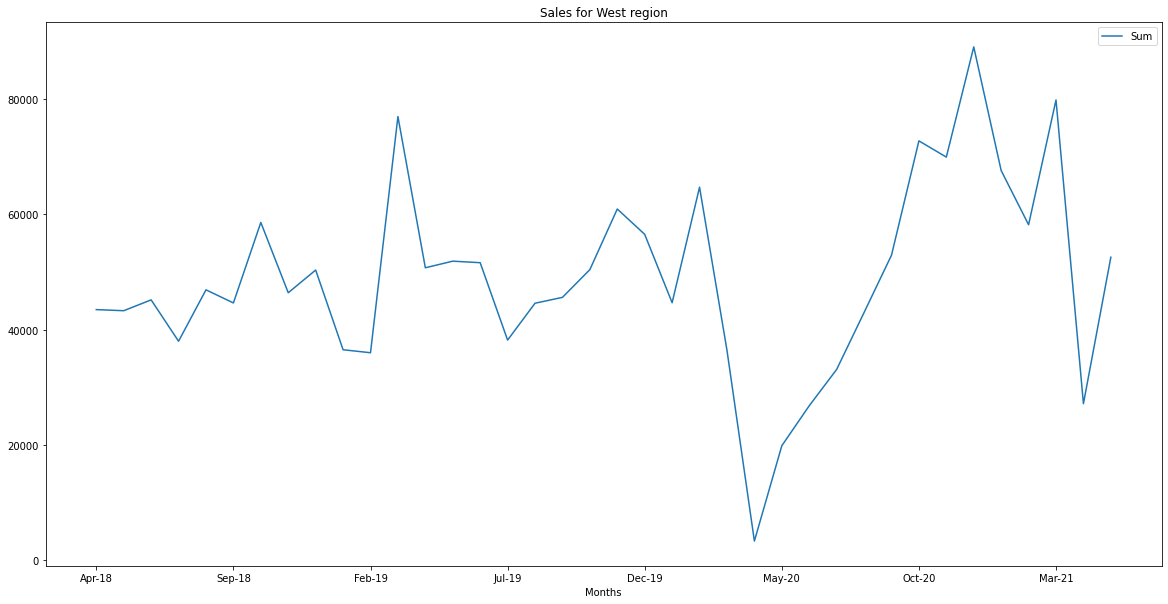

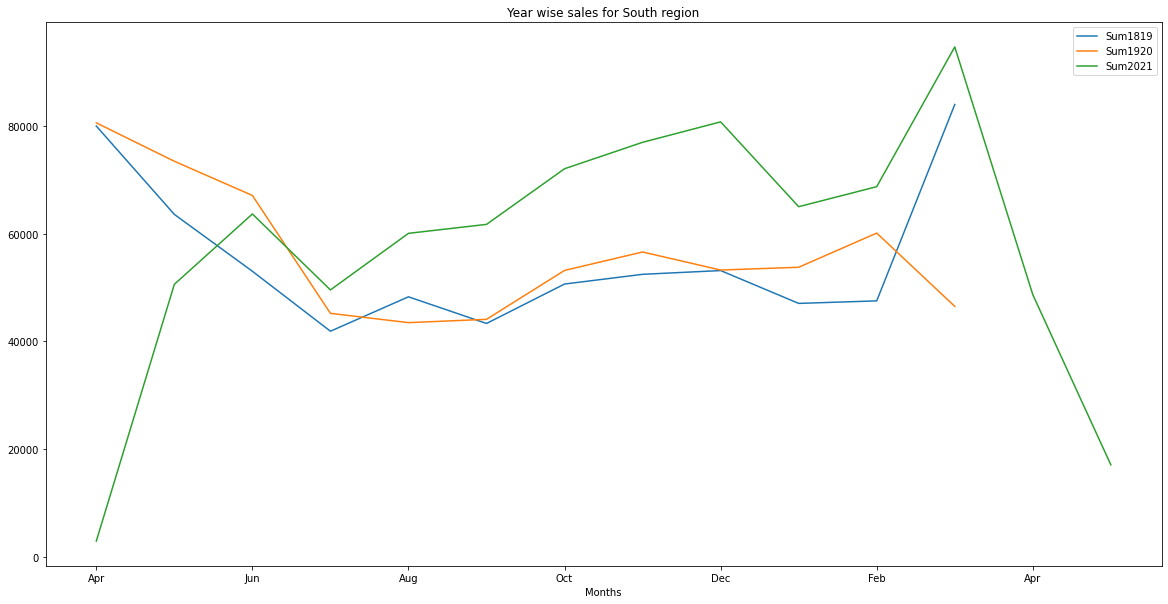

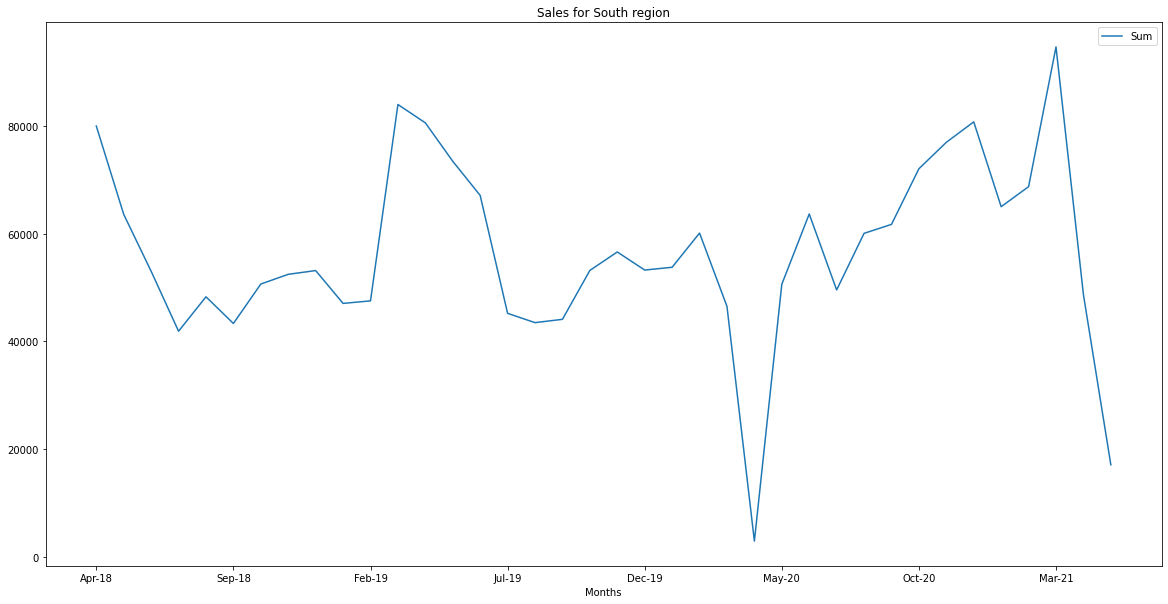

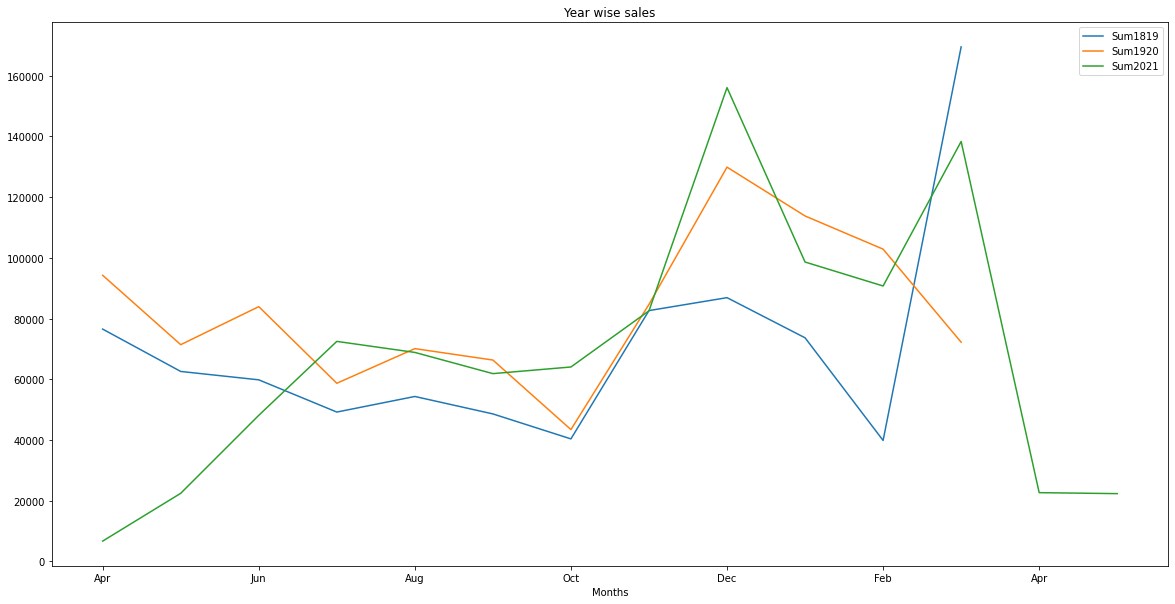

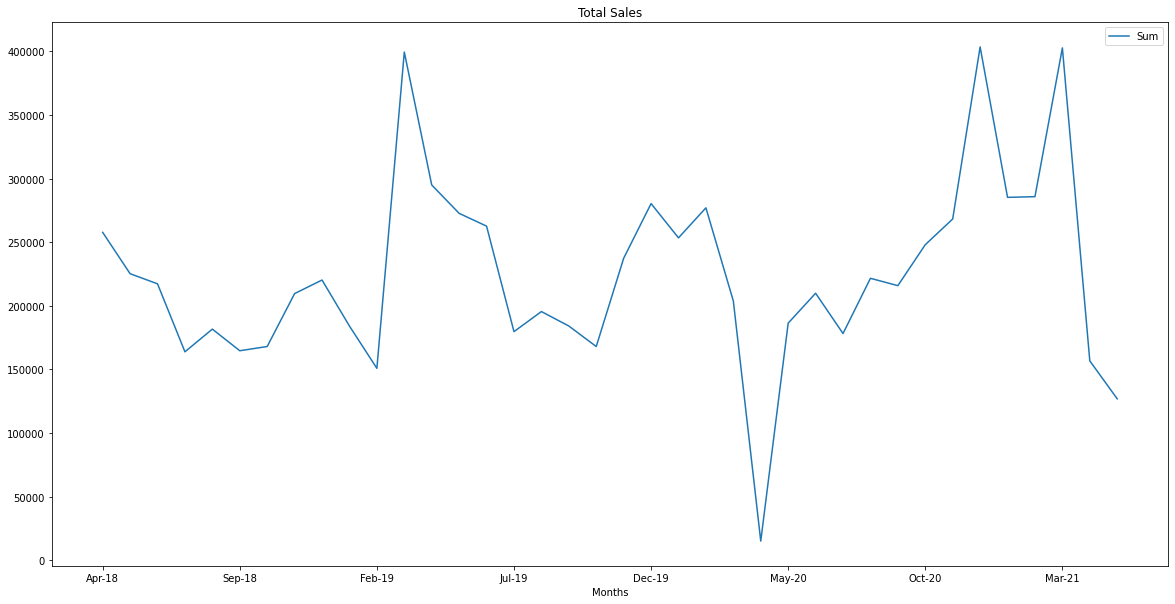

In [ ]:
# North Region
df_N_sum1819 = df_N[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']].sum(axis=0)
df_N_sum1819 = pd.DataFrame(df_N_sum1819, columns = ['Sum1819'])
df_N_sum1819['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_N_sum1819.set_index(['Months'],inplace=True)
ax_N = df_N_sum1819.plot(figsize=(20,10),title="Year wise sales for North region")

df_N_sum1920 = df_N[['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']].sum(axis=0)
df_N_sum1920 = pd.DataFrame(df_N_sum1920, columns = ['Sum1920'])
df_N_sum1920['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_N_sum1920.set_index(['Months'],inplace=True)
df_N_sum1920.plot(ax=ax_N)

df_N_sum2021 = df_N[['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_N_sum2021 = pd.DataFrame(df_N_sum2021, columns = ['Sum2021'])
df_N_sum2021['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_N_sum2021.set_index(['Months'],inplace=True)
df_N_sum2021.plot(ax=ax_N)

df_N_sum = df_N[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_N_sum = pd.DataFrame(df_N_sum, columns = ['Sum'])
df_N_sum['Months'] = pd.Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'])
df_N_sum.set_index(['Months'],inplace=True)
ax_n = df_N_sum.plot(figsize=(20,10),title="Sales for North region")


# East Region
df_E_sum1819 = df_E[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']].sum(axis=0)
df_E_sum1819 = pd.DataFrame(df_E_sum1819, columns = ['Sum1819'])
df_E_sum1819['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_E_sum1819.set_index(['Months'],inplace=True)
ax_E = df_E_sum1819.plot(figsize=(20,10),title="Year wise sales for East region")

df_E_sum1920 = df_E[['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']].sum(axis=0)
df_E_sum1920 = pd.DataFrame(df_E_sum1920, columns = ['Sum1920'])
df_E_sum1920['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_E_sum1920.set_index(['Months'],inplace=True)
df_E_sum1920.plot(ax=ax_E)

df_E_sum2021 = df_E[['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_E_sum2021 = pd.DataFrame(df_E_sum2021, columns = ['Sum2021'])
df_E_sum2021['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_E_sum2021.set_index(['Months'],inplace=True)
df_E_sum2021.plot(ax=ax_E)

df_E_sum = df_E[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_E_sum = pd.DataFrame(df_E_sum, columns = ['Sum'])
df_E_sum['Months'] = pd.Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'])
df_E_sum.set_index(['Months'],inplace=True)
ax_e = df_E_sum.plot(figsize=(20,10),title="Sales for East region")


# West Region
df_W_sum1819 = df_W[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']].sum(axis=0)
df_W_sum1819 = pd.DataFrame(df_W_sum1819, columns = ['Sum1819'])
df_W_sum1819['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_W_sum1819.set_index(['Months'],inplace=True)
ax_W = df_W_sum1819.plot(figsize=(20,10),title="Year wise sales for West region")

df_W_sum1920 = df_W[['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']].sum(axis=0)
df_W_sum1920 = pd.DataFrame(df_W_sum1920, columns = ['Sum1920'])
df_W_sum1920['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_W_sum1920.set_index(['Months'],inplace=True)
df_W_sum1920.plot(ax=ax_W)

df_W_sum2021 = df_W[['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_W_sum2021 = pd.DataFrame(df_W_sum2021, columns = ['Sum2021'])
df_W_sum2021['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_W_sum2021.set_index(['Months'],inplace=True)
df_W_sum2021.plot(ax=ax_W)

df_W_sum = df_W[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_W_sum = pd.DataFrame(df_W_sum, columns = ['Sum'])
df_W_sum['Months'] = pd.Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'])
df_W_sum.set_index(['Months'],inplace=True)
ax_w = df_W_sum.plot(figsize=(20,10),title="Sales for West region")


# South Region
df_S_sum1819 = df_S[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']].sum(axis=0)
df_S_sum1819 = pd.DataFrame(df_S_sum1819, columns = ['Sum1819'])
df_S_sum1819['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_S_sum1819.set_index(['Months'],inplace=True)
ax_S = df_S_sum1819.plot(figsize=(20,10),title="Year wise sales for South region")

df_S_sum1920 = df_S[['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']].sum(axis=0)
df_S_sum1920 = pd.DataFrame(df_S_sum1920, columns = ['Sum1920'])
df_S_sum1920['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_S_sum1920.set_index(['Months'],inplace=True)
df_S_sum1920.plot(ax=ax_S)

df_S_sum2021 = df_S[['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_S_sum2021 = pd.DataFrame(df_S_sum2021, columns = ['Sum2021'])
df_S_sum2021['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_S_sum2021.set_index(['Months'],inplace=True)
df_S_sum2021.plot(ax=ax_S)

df_S_sum = df_S[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_S_sum = pd.DataFrame(df_S_sum, columns = ['Sum'])
df_S_sum['Months'] = pd.Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'])
df_S_sum.set_index(['Months'],inplace=True)
ax_s = df_S_sum.plot(figsize=(20,10),title="Sales for South region")


# All Regions
df_sum1819 = df[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19']].sum(axis=0)
df_sum1819 = pd.DataFrame(df_N_sum1819, columns = ['Sum1819'])
df_sum1819['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_sum1819.set_index(['Months'],inplace=True)
ax = df_sum1819.plot(figsize=(20,10),title="Year wise sales")

df_sum1920 = df[['Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20']].sum(axis=0)
df_sum1920 = pd.DataFrame(df_N_sum1920, columns = ['Sum1920'])
df_sum1920['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar'])
df_sum1920.set_index(['Months'],inplace=True)
df_sum1920.plot(ax=ax)

df_sum2021 = df[['Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_sum2021 = pd.DataFrame(df_N_sum2021, columns = ['Sum2021'])
df_sum2021['Months'] = pd.Index(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 
            'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_sum2021.set_index(['Months'],inplace=True)
df_sum2021.plot(ax=ax)

df_sum = df[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']].sum(axis=0)
df_sum = pd.DataFrame(df_sum, columns = ['Sum'])
df_sum['Months'] = pd.Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 
            'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 
           'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 
           'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21'])
df_sum.set_index(['Months'],inplace=True)
ax_sum = df_sum.plot(figsize=(20,10),title="Total Sales")

#### Finding Popular Products

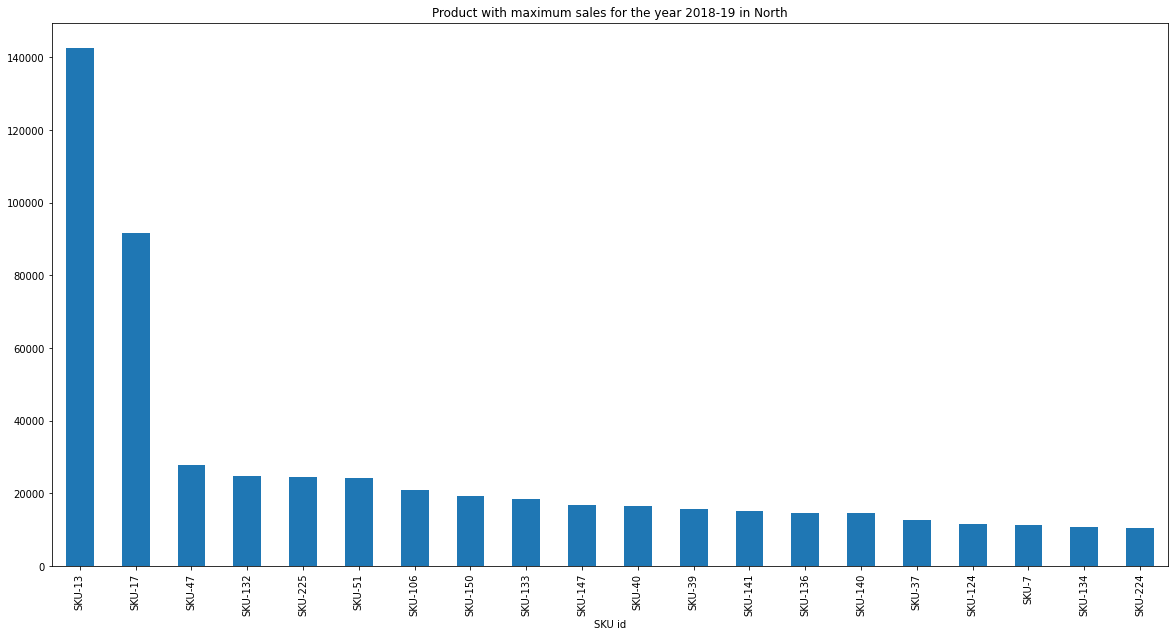

In [ ]:
north_1819=df_N.groupby('SKU id').sum().sort_values('year1819', ascending=False).head(20)['year1819']
north_1819.plot.bar(title="Product with maximum sales for the year 2018-19 in North",figsize=(20,10))

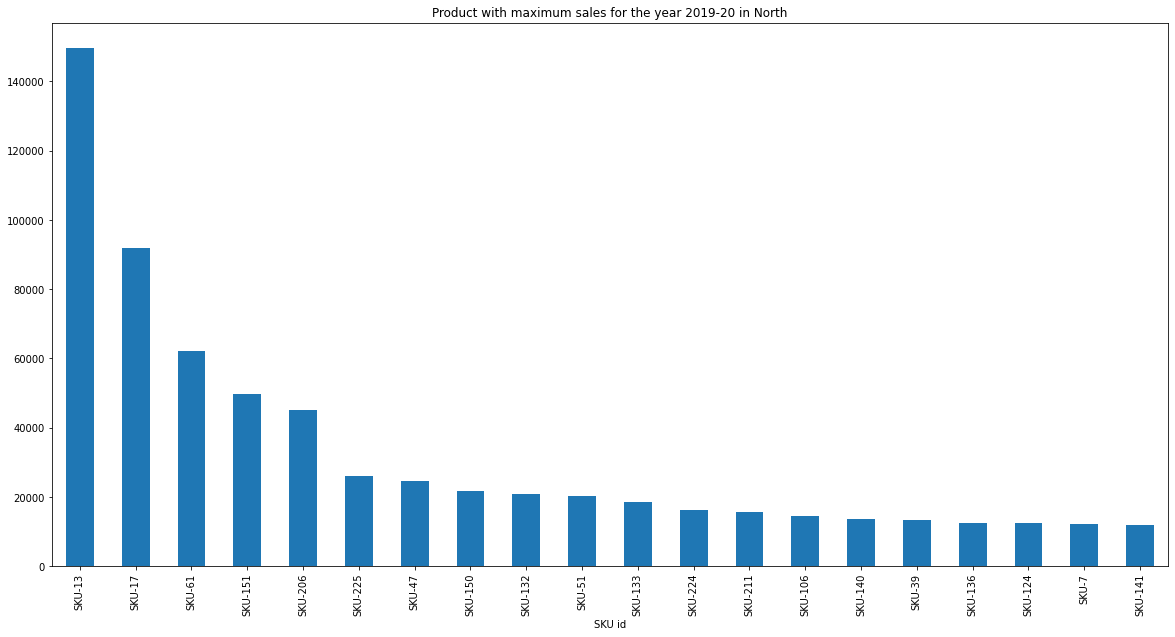

In [ ]:
north_1920=df_N.groupby('SKU id').sum().sort_values('year1920', ascending=False).head(20)['year1920']
north_1920.plot.bar(title="Product with maximum sales for the year 2019-20 in North",figsize=(20,10))

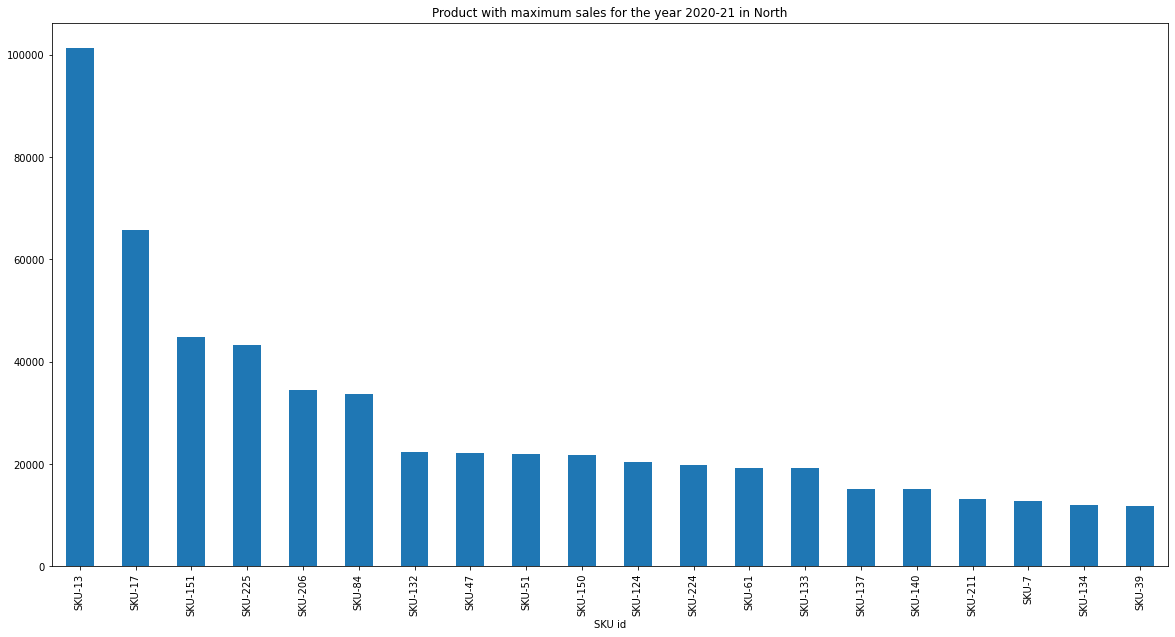

In [ ]:
north_2021=df_N.groupby('SKU id').sum().sort_values('year2021', ascending=False).head(20)['year2021']
north_2021.plot.bar(title="Product with maximum sales for the year 2020-21 in North",figsize=(20,10))

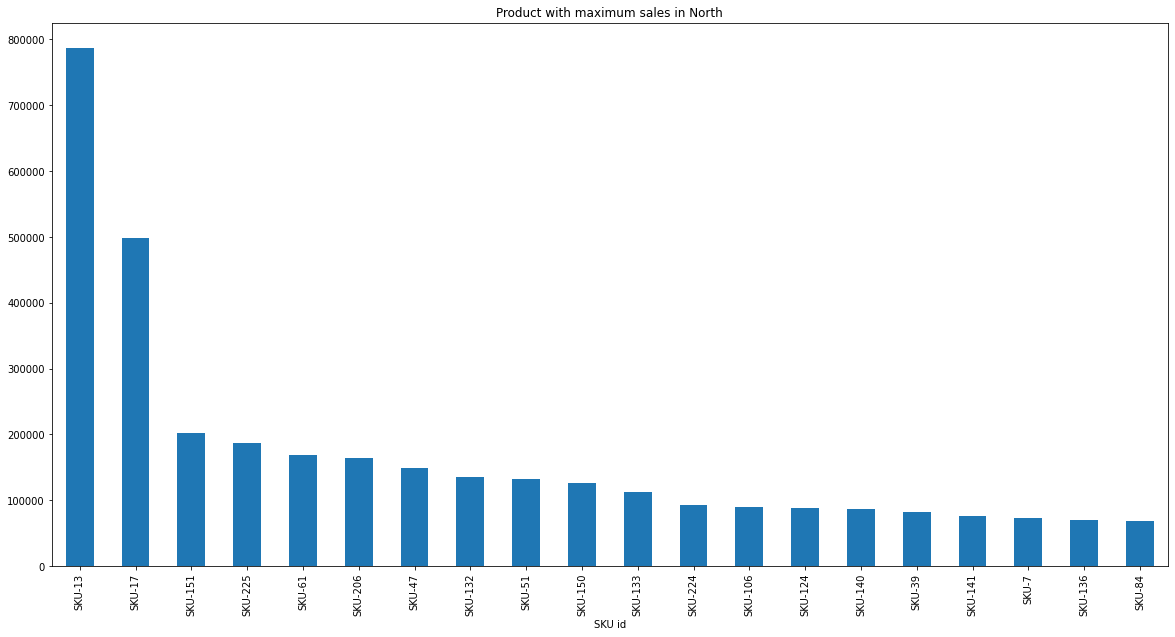

In [ ]:
north_total=df_N.groupby('SKU id').sum().sort_values('sum', ascending=False).head(20)['sum']
north_total.plot.bar(title="Product with maximum sales in North",figsize=(20,10))

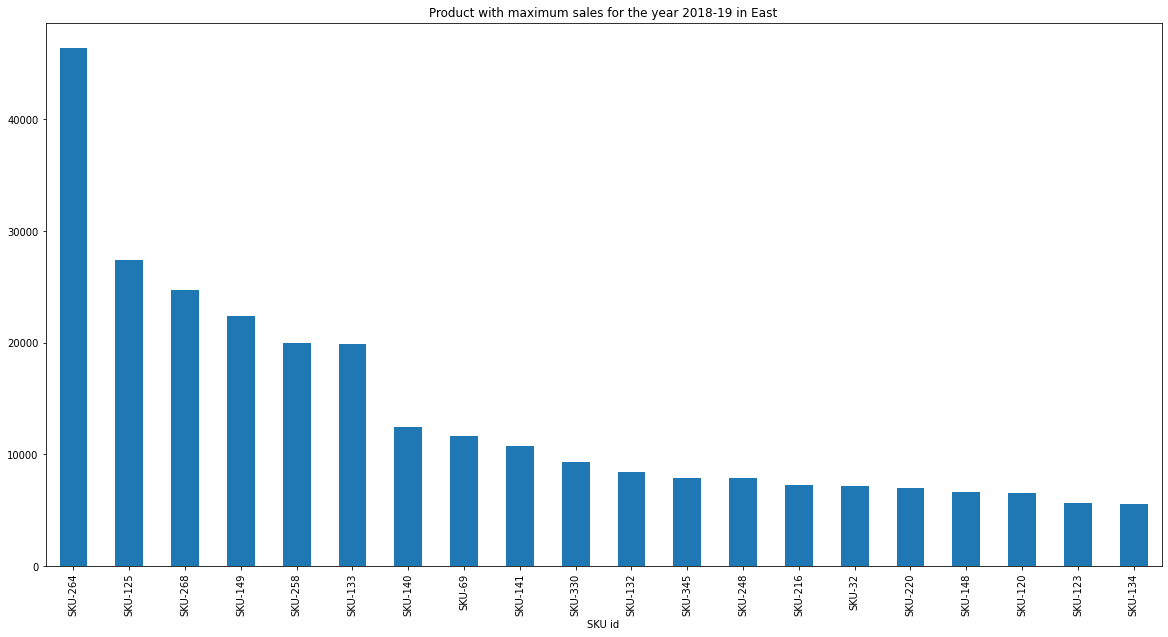

In [ ]:
east_1819=df_E.groupby('SKU id').sum().sort_values('year1819', ascending=False).head(20)['year1819']
east_1819.plot.bar(title="Product with maximum sales for the year 2018-19 in East",figsize=(20,10))

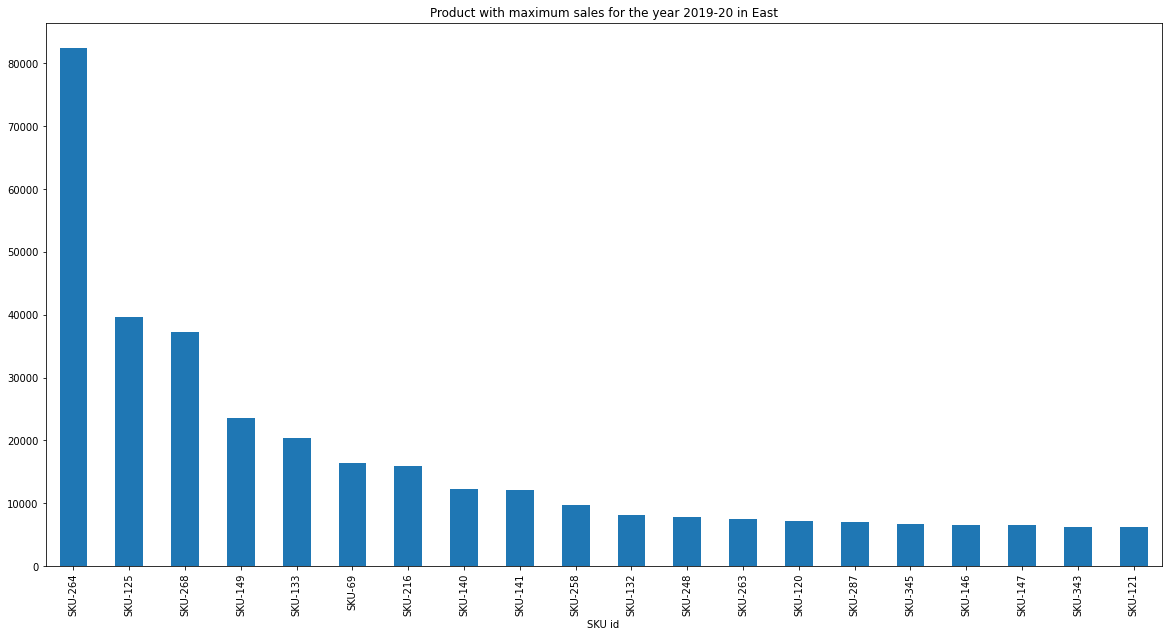

In [ ]:
east_1920=df_E.groupby('SKU id').sum().sort_values('year1920', ascending=False).head(20)['year1920']
east_1920.plot.bar(title="Product with maximum sales for the year 2019-20 in East",figsize=(20,10))

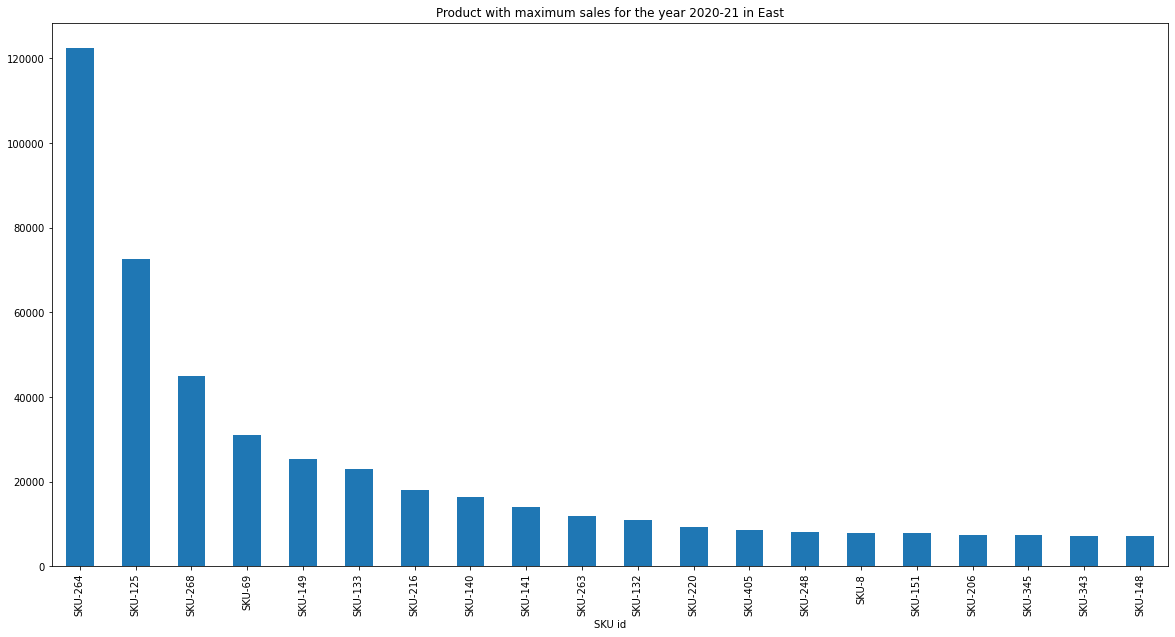

In [ ]:
east_2021=df_E.groupby('SKU id').sum().sort_values('year2021', ascending=False).head(20)['year2021']
east_2021.plot.bar(title="Product with maximum sales for the year 2020-21 in East",figsize=(20,10))

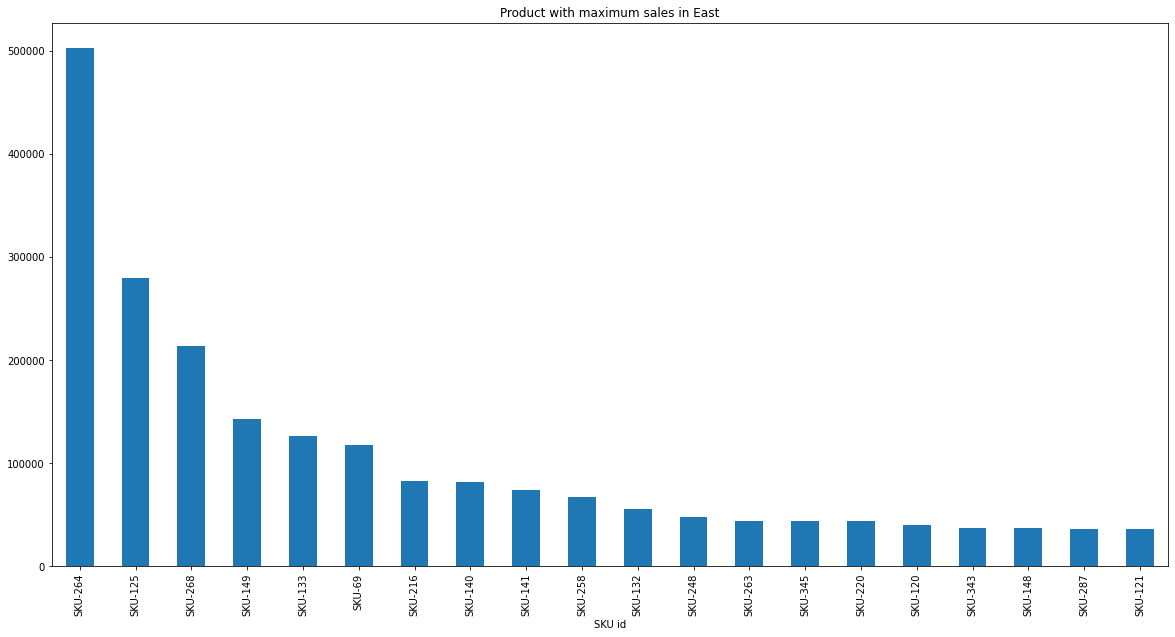

In [ ]:
east_total=df_E.groupby('SKU id').sum().sort_values('sum', ascending=False).head(20)['sum']
east_total.plot.bar(title="Product with maximum sales in East",figsize=(20,10))

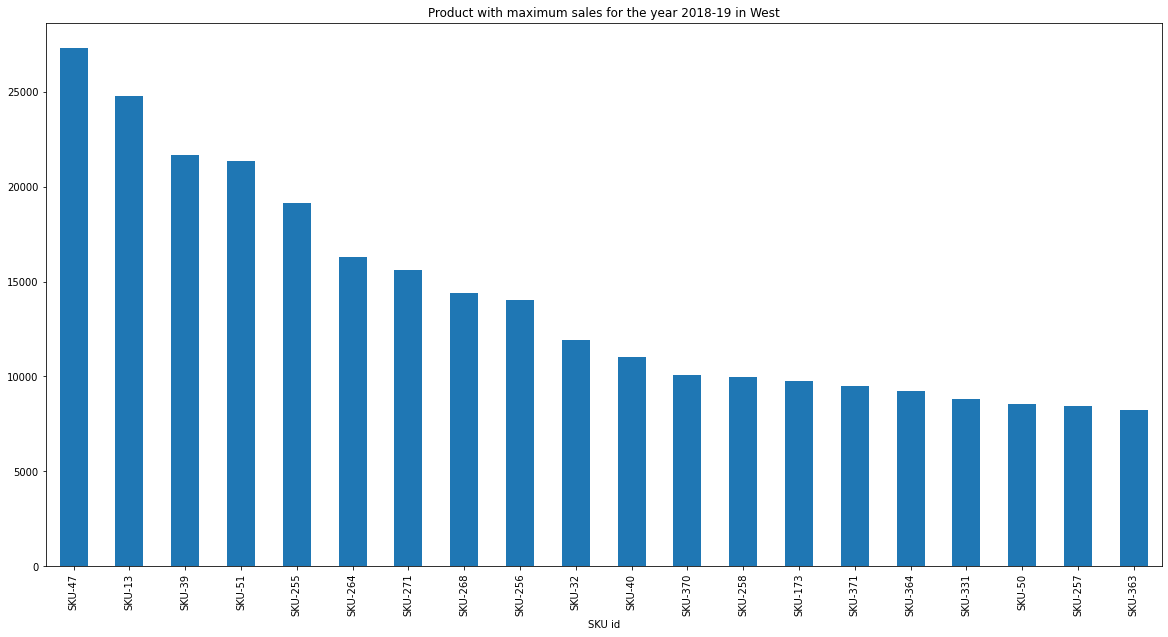

In [ ]:
west_1819=df_W.groupby('SKU id').sum().sort_values('year1819', ascending=False).head(20)['year1819']
west_1819.plot.bar(title="Product with maximum sales for the year 2018-19 in West",figsize=(20,10))

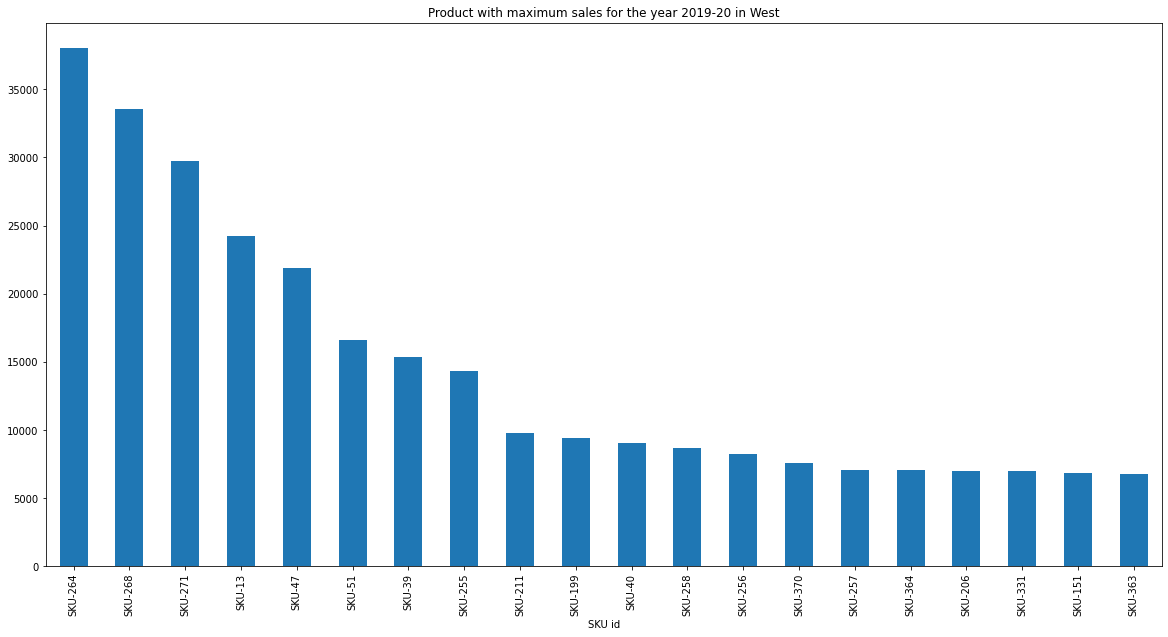

In [ ]:
west_1920=df_W.groupby('SKU id').sum().sort_values('year1920', ascending=False).head(20)['year1920']
west_1920.plot.bar(title="Product with maximum sales for the year 2019-20 in West",figsize=(20,10))

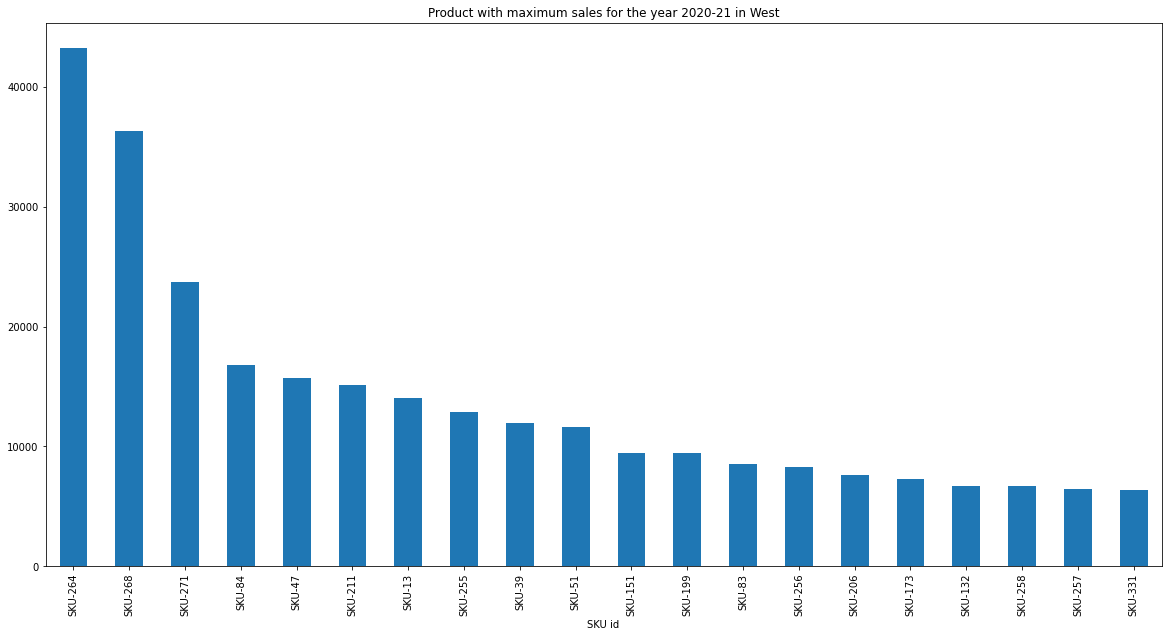

In [ ]:
west_2021=df_W.groupby('SKU id').sum().sort_values('year2021', ascending=False).head(20)['year2021']
west_2021.plot.bar(title="Product with maximum sales for the year 2020-21 in West",figsize=(20,10))

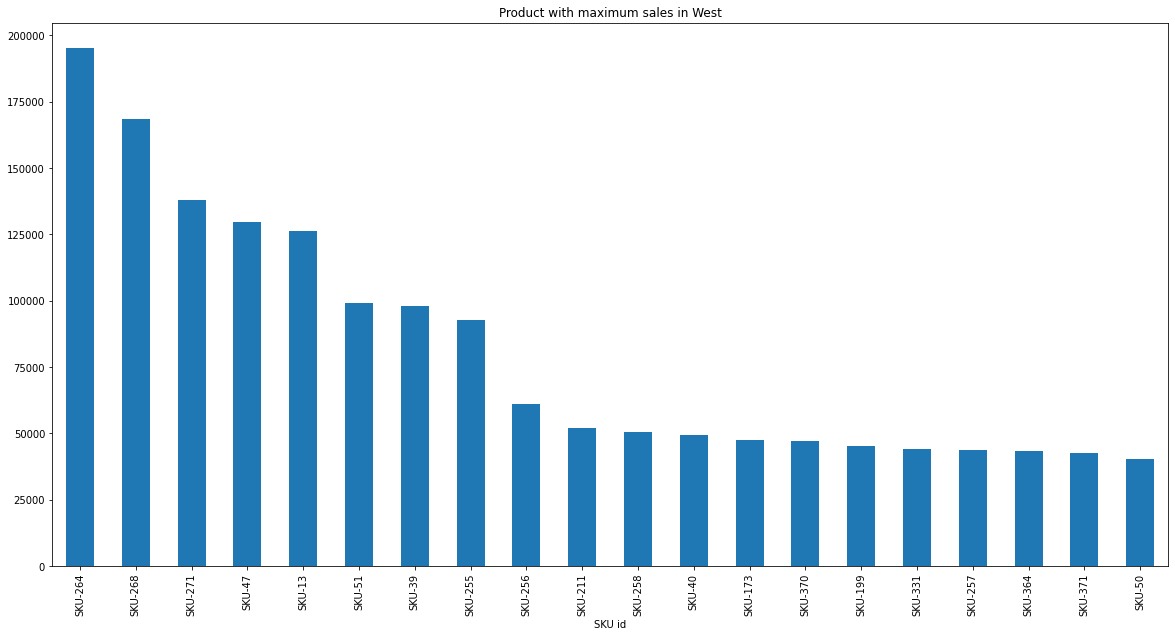

In [ ]:
west_total=df_W.groupby('SKU id').sum().sort_values('sum', ascending=False).head(20)['sum']
west_total.plot.bar(title="Product with maximum sales in West",figsize=(20,10))

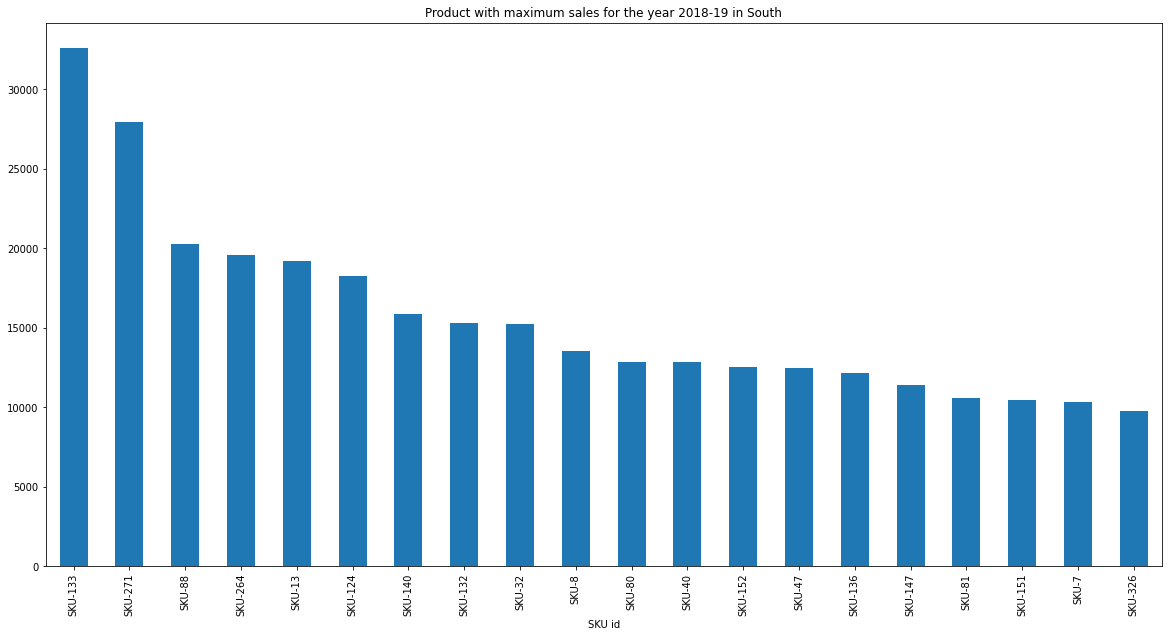

In [ ]:
south_1819=df_S.groupby('SKU id').sum().sort_values('year1819', ascending=False).head(20)['year1819']
south_1819.plot.bar(title="Product with maximum sales for the year 2018-19 in South",figsize=(20,10))

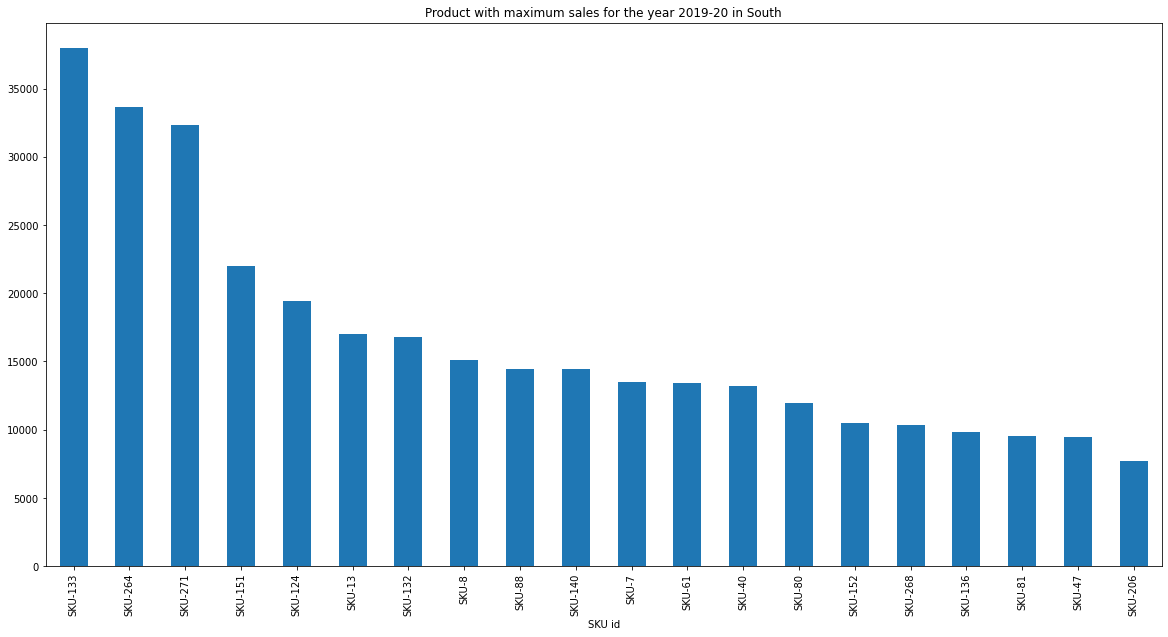

In [ ]:
south_1920=df_S.groupby('SKU id').sum().sort_values('year1920', ascending=False).head(20)['year1920']
south_1920.plot.bar(title="Product with maximum sales for the year 2019-20 in South",figsize=(20,10))

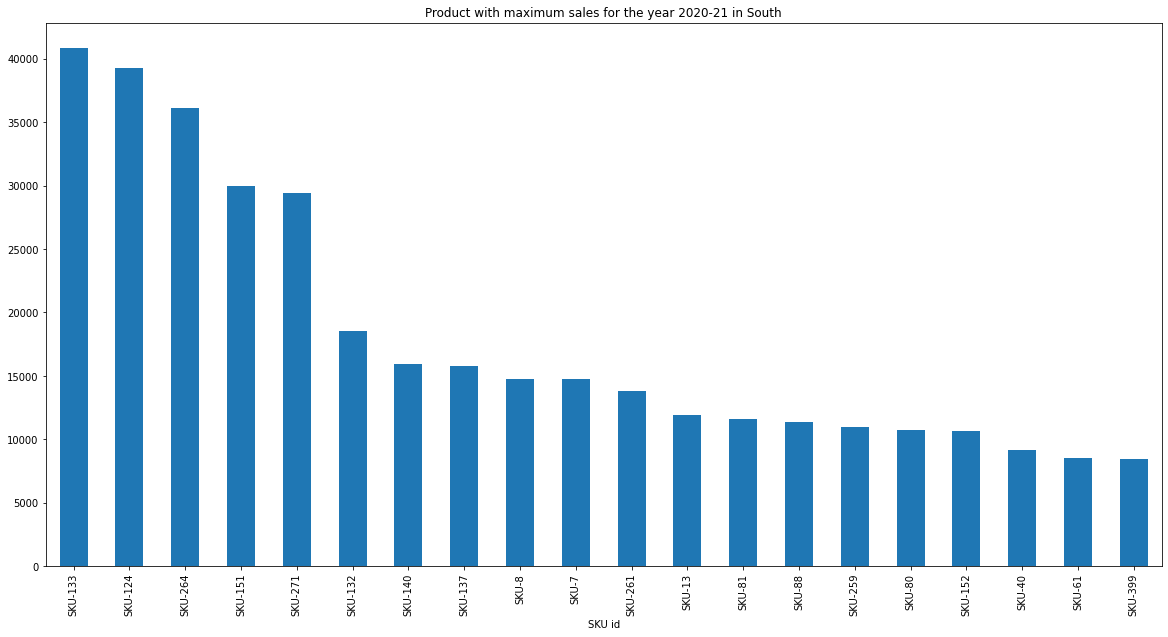

In [ ]:
south_2021=df_S.groupby('SKU id').sum().sort_values('year2021', ascending=False).head(20)['year2021']
south_2021.plot.bar(title="Product with maximum sales for the year 2020-21 in South",figsize=(20,10))

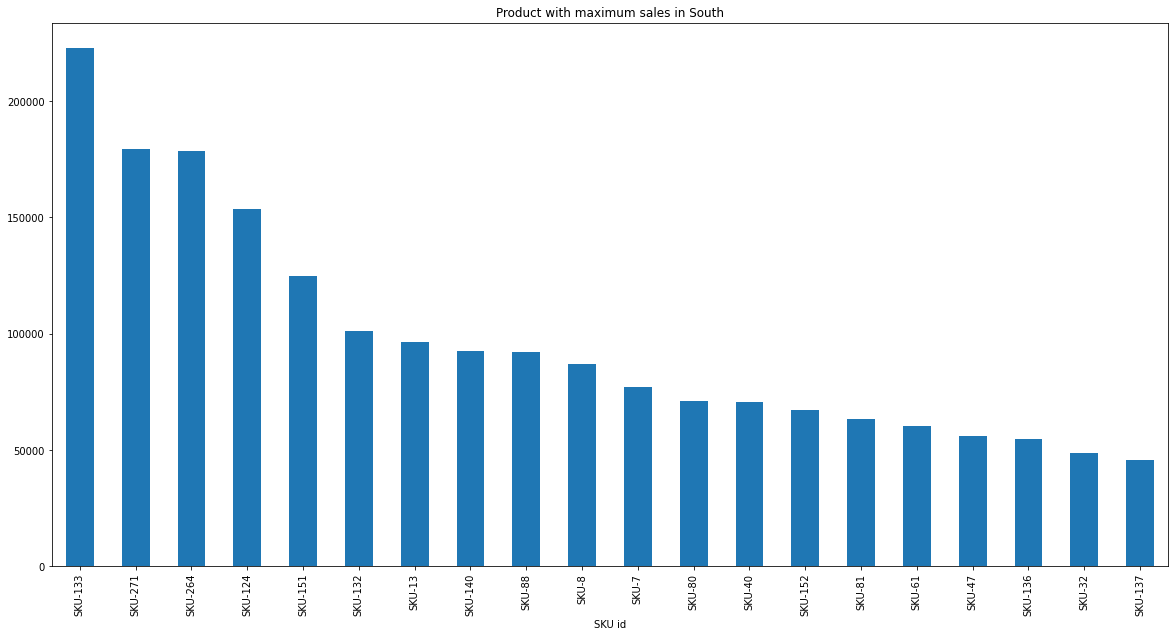

In [ ]:
south_total=df_S.groupby('SKU id').sum().sort_values('sum', ascending=False).head(20)['sum']
south_total.plot.bar(title="Product with maximum sales in South",figsize=(20,10))

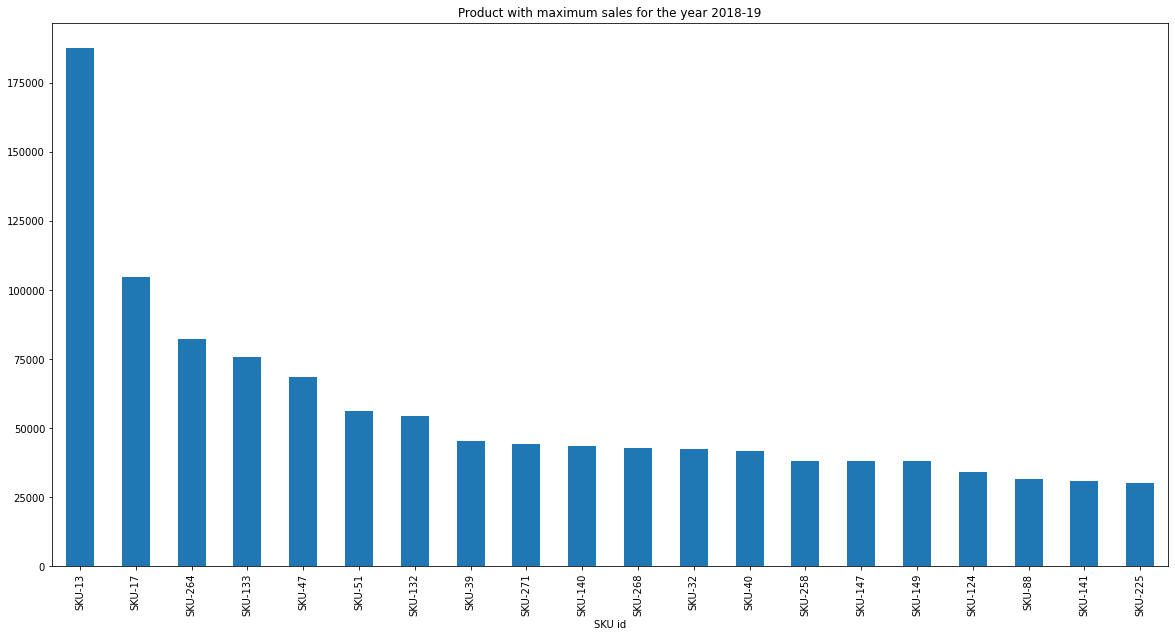

In [ ]:
total=df.groupby('SKU id').sum().sort_values('year1819', ascending=False).head(20)['year1819']
total.plot.bar(title="Product with maximum sales for the year 2018-19",figsize=(20,10))

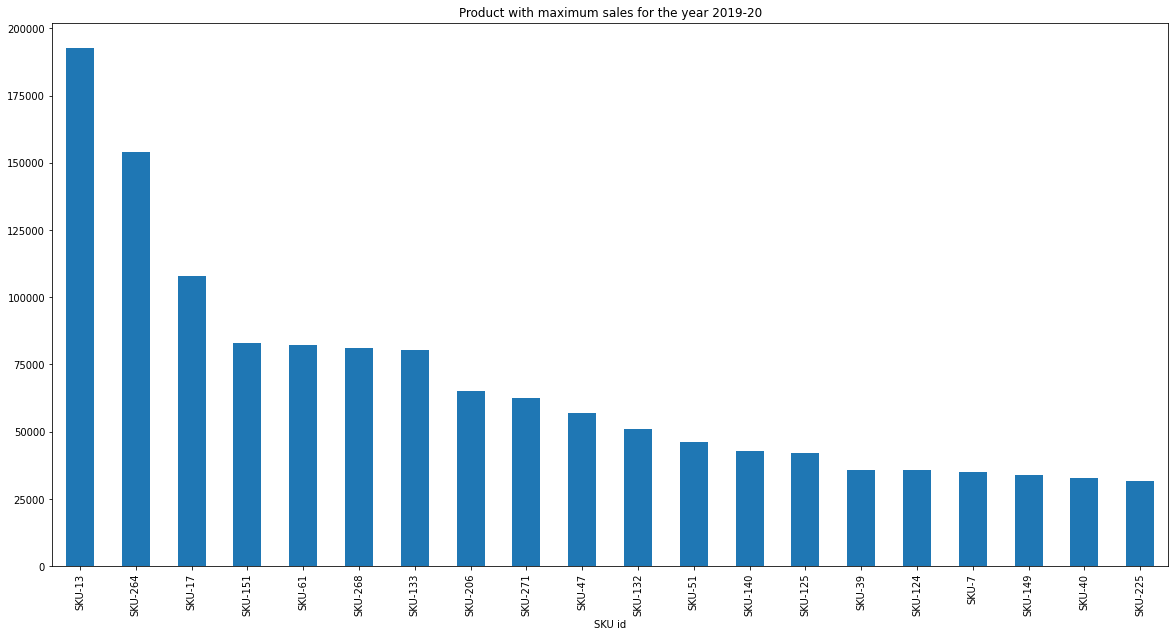

In [ ]:
total=df.groupby('SKU id').sum().sort_values('year1920', ascending=False).head(20)['year1920']
total.plot.bar(title="Product with maximum sales for the year 2019-20",figsize=(20,10))

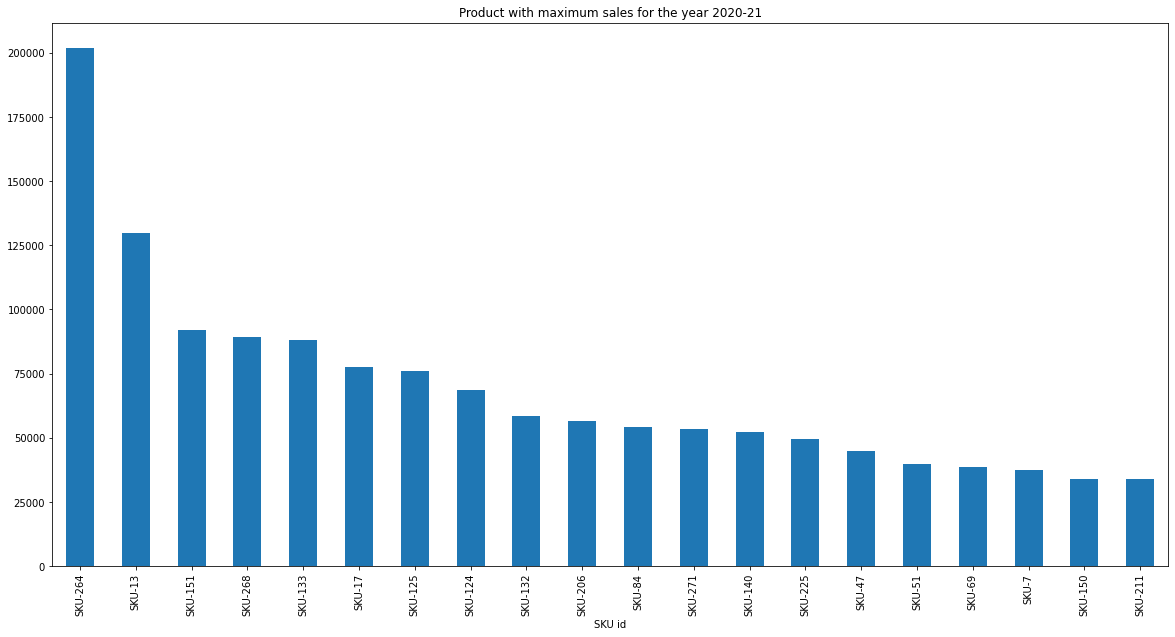

In [ ]:
total=df.groupby('SKU id').sum().sort_values('year2021', ascending=False).head(20)['year2021']
total.plot.bar(title="Product with maximum sales for the year 2020-21",figsize=(20,10))

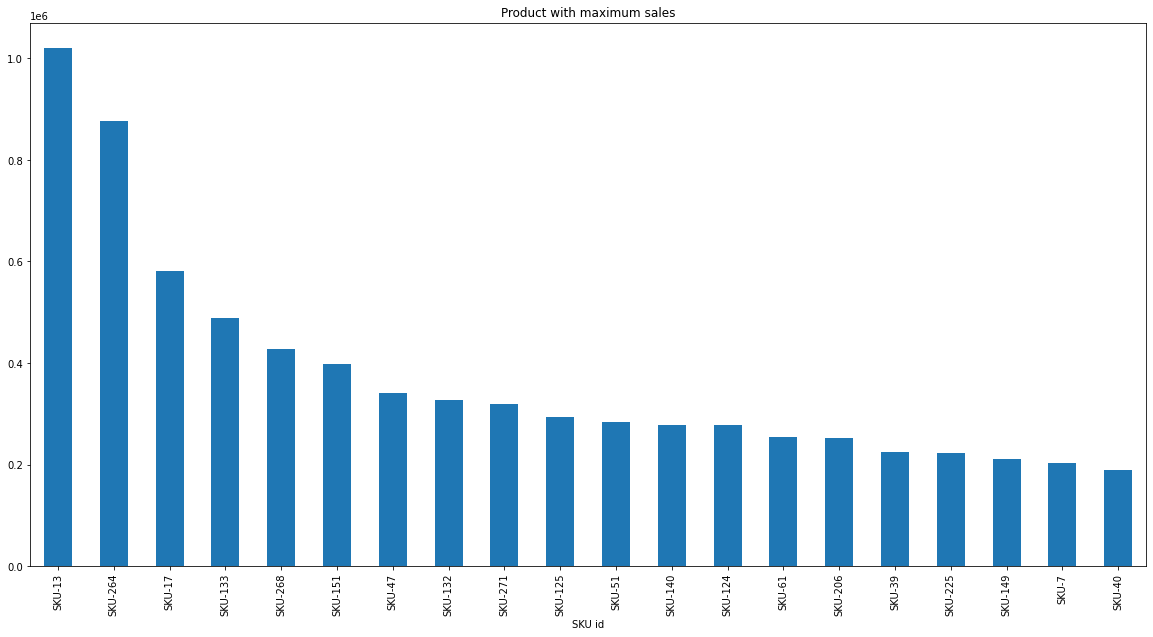

In [ ]:
total=df.groupby('SKU id').sum().sort_values('sum', ascending=False).head(20)['sum']
total.plot.bar(title="Product with maximum sales",figsize=(20,10))

In [ ]:
df['Average'] = df['sum']/38

df_N['Average'] = df_N['sum']/38
df_N['Popular1819'] = np.where(df_N['year1819']>40000, 1, 0)
df_N['Popular1920'] = np.where(df_N['year1920']>40000, 1, 0)
df_N['Popular2021'] = np.where(df_N['year2021']>40000, 1, 0)
df_N['Popular'] = np.where(df_N['sum']>200000, 1, 0)

df_E['Average'] = df_E['sum']/38
df_E['Popular1819'] = np.where(df_E['year1819']>20000, 1, 0)
df_E['Popular1920'] = np.where(df_E['year1920']>20000, 1, 0)
df_E['Popular2021'] = np.where(df_E['year2021']>20000, 1, 0)
df_E['Popular'] = np.where(df_E['sum']>100000, 1, 0)

df_W['Average'] = df_W['sum']/38
df_W['Popular1819'] = np.where(df_W['year1819']>20000, 1, 0)
df_W['Popular1920'] = np.where(df_W['year1920']>20000, 1, 0)
df_W['Popular2021'] = np.where(df_W['year2021']>20000, 1, 0)
df_W['Popular'] = np.where(df_W['sum']>100000, 1, 0)

df_S['Average'] = df_S['sum']/38
df_S['Popular1819'] = np.where(df_S['year1819']>20000, 1, 0)
df_S['Popular1920'] = np.where(df_S['year1920']>20000, 1, 0)
df_S['Popular2021'] = np.where(df_S['year2021']>20000, 1, 0)
df_S['Popular'] = np.where(df_S['sum']>100000, 1, 0)

In [ ]:
df_N.loc[df_N.Popular1819 == 1].sort_values('year1819', ascending=False)

Warehouse id Region  SKU id   Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
12         Wh-1  NORTH  SKU-13  17540.0  4896.0  2860.0  1900.0  6700.0   
16         Wh-1  NORTH  SKU-17   8458.0  4834.0  3066.0  2642.0  5362.0   

    Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
12  4604.0  1220.0  ...  1020.0  142432.0  149500.0  101224.0  786312.0   
16  4358.0   242.0  ...  1202.0   91684.0   91984.0   65648.0  498632.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
12  20692.421053            1            1            1        1  
16  13121.894737            1            1            1        1  

[2 rows x 50 columns]

In [ ]:
df_N.loc[df_N.Popular1920 == 1].sort_values('year1920', ascending=False)

Warehouse id Region   SKU id   Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
12          Wh-1  NORTH   SKU-13  17540.0  4896.0  2860.0  1900.0  6700.0   
16          Wh-1  NORTH   SKU-17   8458.0  4834.0  3066.0  2642.0  5362.0   
60          Wh-1  NORTH   SKU-61     10.0    10.0    10.0    10.0    10.0   
150         Wh-1  NORTH  SKU-151    772.0  1357.0  2005.0   286.0   430.0   
205         Wh-1  NORTH  SKU-206      3.0     3.0     3.0     3.0     3.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
12   4604.0  1220.0  ...  1020.0  142432.0  149500.0  101224.0  786312.0   
16   4358.0   242.0  ...  1202.0   91684.0   91984.0   65648.0  498632.0   
60     10.0    10.0  ...    10.0    2880.0   62188.0   19176.0  168488.0   
150   118.0   280.0  ...   400.0    7053.0   49611.0   44789.0  202906.0   
205     3.0     3.0  ...  1195.0    2612.0   45080.0   34398.0  164180.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
12   20692.421053            1            1            1        1  
16   13121.894737            1            1            1        1  
60    4433.894737            0            1            0        0  
150   5339.631579            0            1            1        1  
205   4320.526316            0            1            0        0  

[5 rows x 50 columns]

In [ ]:
df_N.loc[df_N.Popular2021 == 1].sort_values('year2021', ascending=False)

Warehouse id Region   SKU id   Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
12          Wh-1  NORTH   SKU-13  17540.0  4896.0  2860.0  1900.0  6700.0   
16          Wh-1  NORTH   SKU-17   8458.0  4834.0  3066.0  2642.0  5362.0   
150         Wh-1  NORTH  SKU-151    772.0  1357.0  2005.0   286.0   430.0   
224         Wh-1  NORTH  SKU-225    817.0   669.0  1577.0   321.0   325.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
12   4604.0  1220.0  ...  1020.0  142432.0  149500.0  101224.0  786312.0   
16   4358.0   242.0  ...  1202.0   91684.0   91984.0   65648.0  498632.0   
150   118.0   280.0  ...   400.0    7053.0   49611.0   44789.0  202906.0   
224  1007.0  1427.0  ...   349.0   24650.0   26052.0   43190.0  187784.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
12   20692.421053            1            1            1        1  
16   13121.894737            1            1            1        1  
150   5339.631579            0            1            1        1  
224   4941.684211            0            0            1        0  

[4 rows x 50 columns]

In [ ]:
df_N.loc[df_N.Popular == 1].sort_values('sum', ascending=False)

Warehouse id Region   SKU id   Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
12          Wh-1  NORTH   SKU-13  17540.0  4896.0  2860.0  1900.0  6700.0   
16          Wh-1  NORTH   SKU-17   8458.0  4834.0  3066.0  2642.0  5362.0   
150         Wh-1  NORTH  SKU-151    772.0  1357.0  2005.0   286.0   430.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
12   4604.0  1220.0  ...  1020.0  142432.0  149500.0  101224.0  786312.0   
16   4358.0   242.0  ...  1202.0   91684.0   91984.0   65648.0  498632.0   
150   118.0   280.0  ...   400.0    7053.0   49611.0   44789.0  202906.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
12   20692.421053            1            1            1        1  
16   13121.894737            1            1            1        1  
150   5339.631579            0            1            1        1  

[3 rows x 50 columns]

In [ ]:
df_E.loc[df_E.Popular1819 == 1].sort_values('year1819', ascending=False)


Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
319         Wh-2   EAST  SKU-264  6787.0  5029.0  4273.0  3151.0  3271.0   
359         Wh-2   EAST  SKU-125   985.0  3497.0  5823.0  2319.0  1221.0   
322         Wh-2   EAST  SKU-268  4014.0  3210.0  1770.0  1935.0  2058.0   
385         Wh-2   EAST  SKU-149  2476.0  2994.0  3000.0  2744.0  1820.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
319  2989.0  1279.0  ...  4669.0   46350.0   82332.0  122372.0  502108.0   
359   905.0   423.0  ...  2873.0   27384.0   39616.0   72638.0  279276.0   
322  1878.0   867.0  ...  2223.0   24693.0   37209.0   45054.0  213912.0   
385  1608.0   732.0  ...  1000.0   22388.0   23512.0   25328.0  142456.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
319  13213.368421            1            1            1        1  
359   7349.368421            1            1            1        1  
322   5629.263158            1            1            1        1  
385   3748.842105            1            1            1        1  

[4 rows x 50 columns]

In [ ]:
df_E.loc[df_E.Popular1920 == 1].sort_values('year1920', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
319         Wh-2   EAST  SKU-264  6787.0  5029.0  4273.0  3151.0  3271.0   
359         Wh-2   EAST  SKU-125   985.0  3497.0  5823.0  2319.0  1221.0   
322         Wh-2   EAST  SKU-268  4014.0  3210.0  1770.0  1935.0  2058.0   
385         Wh-2   EAST  SKU-149  2476.0  2994.0  3000.0  2744.0  1820.0   
368         Wh-2   EAST  SKU-133  1647.0  1887.0  1691.0  1523.0  1979.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
319  2989.0  1279.0  ...  4669.0   46350.0   82332.0  122372.0  502108.0   
359   905.0   423.0  ...  2873.0   27384.0   39616.0   72638.0  279276.0   
322  1878.0   867.0  ...  2223.0   24693.0   37209.0   45054.0  213912.0   
385  1608.0   732.0  ...  1000.0   22388.0   23512.0   25328.0  142456.0   
368  1715.0  1015.0  ...   779.0   19924.0   20424.0   22962.0  126620.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
319  13213.368421            1            1            1        1  
359   7349.368421            1            1            1        1  
322   5629.263158            1            1            1        1  
385   3748.842105            1            1            1        1  
368   3332.105263            0            1            1        1  

[5 rows x 50 columns]

In [ ]:
df_E.loc[df_E.Popular2021 == 1].sort_values('year2021', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
319         Wh-2   EAST  SKU-264  6787.0  5029.0  4273.0  3151.0  3271.0   
359         Wh-2   EAST  SKU-125   985.0  3497.0  5823.0  2319.0  1221.0   
322         Wh-2   EAST  SKU-268  4014.0  3210.0  1770.0  1935.0  2058.0   
284         Wh-2   EAST   SKU-69  1065.0  2433.0  1489.0   809.0   817.0   
385         Wh-2   EAST  SKU-149  2476.0  2994.0  3000.0  2744.0  1820.0   
368         Wh-2   EAST  SKU-133  1647.0  1887.0  1691.0  1523.0  1979.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
319  2989.0  1279.0  ...  4669.0   46350.0   82332.0  122372.0  502108.0   
359   905.0   423.0  ...  2873.0   27384.0   39616.0   72638.0  279276.0   
322  1878.0   867.0  ...  2223.0   24693.0   37209.0   45054.0  213912.0   
284   345.0   349.0  ...  2801.0   11696.0   16344.0   30962.0  118004.0   
385  1608.0   732.0  ...  1000.0   22388.0   23512.0   25328.0  142456.0   
368  1715.0  1015.0  ...   779.0   19924.0   20424.0   22962.0  126620.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
319  13213.368421            1            1            1        1  
359   7349.368421            1            1            1        1  
322   5629.263158            1            1            1        1  
284   3105.368421            0            0            1        1  
385   3748.842105            1            1            1        1  
368   3332.105263            0            1            1        1  

[6 rows x 50 columns]

In [ ]:
df_E.loc[df_E.Popular == 1].sort_values('sum', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
319         Wh-2   EAST  SKU-264  6787.0  5029.0  4273.0  3151.0  3271.0   
359         Wh-2   EAST  SKU-125   985.0  3497.0  5823.0  2319.0  1221.0   
322         Wh-2   EAST  SKU-268  4014.0  3210.0  1770.0  1935.0  2058.0   
385         Wh-2   EAST  SKU-149  2476.0  2994.0  3000.0  2744.0  1820.0   
368         Wh-2   EAST  SKU-133  1647.0  1887.0  1691.0  1523.0  1979.0   
284         Wh-2   EAST   SKU-69  1065.0  2433.0  1489.0   809.0   817.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
319  2989.0  1279.0  ...  4669.0   46350.0   82332.0  122372.0  502108.0   
359   905.0   423.0  ...  2873.0   27384.0   39616.0   72638.0  279276.0   
322  1878.0   867.0  ...  2223.0   24693.0   37209.0   45054.0  213912.0   
385  1608.0   732.0  ...  1000.0   22388.0   23512.0   25328.0  142456.0   
368  1715.0  1015.0  ...   779.0   19924.0   20424.0   22962.0  126620.0   
284   345.0   349.0  ...  2801.0   11696.0   16344.0   30962.0  118004.0   

          Average  Popular1819  Popular1920  Popular2021  Popular  
319  13213.368421            1            1            1        1  
359   7349.368421            1            1            1        1  
322   5629.263158            1            1            1        1  
385   3748.842105            1            1            1        1  
368   3332.105263            0            1            1        1  
284   3105.368421            0            0            1        1  

[6 rows x 50 columns]

In [ ]:
df_W.loc[df_W.Popular1819 == 1].sort_values('year1819', ascending=False)

Warehouse id Region  SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
500         Wh-3   WEST  SKU-47  2539.0  1987.0  2235.0  1803.0  2507.0   
457         Wh-3   WEST  SKU-13  3074.0  2732.0  2018.0  1622.0  2087.0   
489         Wh-3   WEST  SKU-39  1511.0  1671.0  2015.0  1215.0  2063.0   
503         Wh-3   WEST  SKU-51  2276.0  1466.0  2153.0  1346.0  1598.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
500  3167.0  2663.0  ...  1315.0   27288.0   21900.0   15710.0  129796.0   
457  2288.0  3104.0  ...   806.0   24765.0   24252.0   14062.0  126158.0   
489  1583.0  2467.0  ...   647.0   21656.0   15348.0   11934.0   97876.0   
503  1478.0  2819.0  ...   725.0   21378.0   16569.0   11656.0   99206.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
500  3415.684211            1            1            0        1  
457  3319.947368            1            1            0        1  
489  2575.684211            1            0            0        0  
503  2610.684211            1            0            0        0  

[4 rows x 50 columns]

In [ ]:
df_W.loc[df_W.Popular1920 == 1].sort_values('year1920', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
580         Wh-3   WEST  SKU-264  1124.0  1010.0  1118.0  1016.0  1808.0   
584         Wh-3   WEST  SKU-268   947.0   691.0   883.0  1223.0  1759.0   
588         Wh-3   WEST  SKU-271   868.0   492.0   572.0   632.0   768.0   
457         Wh-3   WEST   SKU-13  3074.0  2732.0  2018.0  1622.0  2087.0   
500         Wh-3   WEST   SKU-47  2539.0  1987.0  2235.0  1803.0  2507.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
580  1220.0  1664.0  ...  3812.0   16317.0   38001.0   43204.0  195044.0   
584   707.0  1639.0  ...  2739.0   14424.0   33532.0   36318.0  168548.0   
588   588.0  1984.0  ...  2956.0   15600.0   29704.0   23716.0  138040.0   
457  2288.0  3104.0  ...   806.0   24765.0   24252.0   14062.0  126158.0   
500  3167.0  2663.0  ...  1315.0   27288.0   21900.0   15710.0  129796.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
580  5132.736842            0            1            1        1  
584  4435.473684            0            1            1        1  
588  3632.631579            0            1            1        1  
457  3319.947368            1            1            0        1  
500  3415.684211            1            1            0        1  

[5 rows x 50 columns]

In [ ]:
df_W.loc[df_W.Popular2021 == 1].sort_values('year2021', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
580         Wh-3   WEST  SKU-264  1124.0  1010.0  1118.0  1016.0  1808.0   
584         Wh-3   WEST  SKU-268   947.0   691.0   883.0  1223.0  1759.0   
588         Wh-3   WEST  SKU-271   868.0   492.0   572.0   632.0   768.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
580  1220.0  1664.0  ...  3812.0   16317.0   38001.0   43204.0  195044.0   
584   707.0  1639.0  ...  2739.0   14424.0   33532.0   36318.0  168548.0   
588   588.0  1984.0  ...  2956.0   15600.0   29704.0   23716.0  138040.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
580  5132.736842            0            1            1        1  
584  4435.473684            0            1            1        1  
588  3632.631579            0            1            1        1  

[3 rows x 50 columns]

In [ ]:
df_W.loc[df_W.Popular == 1].sort_values('sum', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
580         Wh-3   WEST  SKU-264  1124.0  1010.0  1118.0  1016.0  1808.0   
584         Wh-3   WEST  SKU-268   947.0   691.0   883.0  1223.0  1759.0   
588         Wh-3   WEST  SKU-271   868.0   492.0   572.0   632.0   768.0   
500         Wh-3   WEST   SKU-47  2539.0  1987.0  2235.0  1803.0  2507.0   
457         Wh-3   WEST   SKU-13  3074.0  2732.0  2018.0  1622.0  2087.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
580  1220.0  1664.0  ...  3812.0   16317.0   38001.0   43204.0  195044.0   
584   707.0  1639.0  ...  2739.0   14424.0   33532.0   36318.0  168548.0   
588   588.0  1984.0  ...  2956.0   15600.0   29704.0   23716.0  138040.0   
500  3167.0  2663.0  ...  1315.0   27288.0   21900.0   15710.0  129796.0   
457  2288.0  3104.0  ...   806.0   24765.0   24252.0   14062.0  126158.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
580  5132.736842            0            1            1        1  
584  4435.473684            0            1            1        1  
588  3632.631579            0            1            1        1  
500  3415.684211            1            1            0        1  
457  3319.947368            1            1            0        1  

[5 rows x 50 columns]

In [ ]:
df_S.loc[df_S.Popular1819 == 1].sort_values('year1819', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
936         Wh-4  SOUTH  SKU-133  3524.0  2928.0  2856.0  2088.0  3548.0   
877         Wh-4  SOUTH  SKU-271  2601.0  1926.0  2433.0  2196.0  1707.0   
844         Wh-4  SOUTH   SKU-88  2408.0  2789.0  1037.0  1709.0  2336.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
936  2012.0  3576.0  ...   452.0   32560.0   37936.0   40812.0  222616.0   
877  2160.0  2361.0  ...   609.0   27963.0   32334.0   29397.0  179388.0   
844  1103.0  1565.0  ...   344.0   20247.0   14466.0   11401.0   92228.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
936  5858.315789            1            1            1        1  
877  4720.736842            1            1            1        1  
844  2427.052632            1            0            0        0  

[3 rows x 50 columns]

In [ ]:
df_S.loc[df_S.Popular1920 == 1].sort_values('year1920', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
936         Wh-4  SOUTH  SKU-133  3524.0  2928.0  2856.0  2088.0  3548.0   
872         Wh-4  SOUTH  SKU-264  2189.0  1461.0  1429.0  1109.0  1125.0   
877         Wh-4  SOUTH  SKU-271  2601.0  1926.0  2433.0  2196.0  1707.0   
956         Wh-4  SOUTH  SKU-151  2208.0  1422.0   724.0   520.0   442.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
936  2012.0  3576.0  ...   452.0   32560.0   37936.0   40812.0  222616.0   
872   965.0  1461.0  ...  1141.0   19568.0   33668.0   36086.0  178644.0   
877  2160.0  2361.0  ...   609.0   27963.0   32334.0   29397.0  179388.0   
956   616.0   920.0  ...   624.0   10482.0   22012.0   29984.0  124956.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
936  5858.315789            1            1            1        1  
872  4701.157895            0            1            1        1  
877  4720.736842            1            1            1        1  
956  3288.315789            0            1            1        1  

[4 rows x 50 columns]

In [ ]:
df_S.loc[df_S.Popular2021 == 1].sort_values('year2021', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
936         Wh-4  SOUTH  SKU-133  3524.0  2928.0  2856.0  2088.0  3548.0   
926         Wh-4  SOUTH  SKU-124  3193.0  1441.0   568.0   181.0   307.0   
872         Wh-4  SOUTH  SKU-264  2189.0  1461.0  1429.0  1109.0  1125.0   
956         Wh-4  SOUTH  SKU-151  2208.0  1422.0   724.0   520.0   442.0   
877         Wh-4  SOUTH  SKU-271  2601.0  1926.0  2433.0  2196.0  1707.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
936  2012.0  3576.0  ...   452.0   32560.0   37936.0   40812.0  222616.0   
926   715.0   823.0  ...   751.0   18246.0   19404.0   39236.0  153772.0   
872   965.0  1461.0  ...  1141.0   19568.0   33668.0   36086.0  178644.0   
956   616.0   920.0  ...   624.0   10482.0   22012.0   29984.0  124956.0   
877  2160.0  2361.0  ...   609.0   27963.0   32334.0   29397.0  179388.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
936  5858.315789            1            1            1        1  
926  4046.631579            0            0            1        1  
872  4701.157895            0            1            1        1  
956  3288.315789            0            1            1        1  
877  4720.736842            1            1            1        1  

[5 rows x 50 columns]

In [ ]:
df_S.loc[df_S.Popular == 1].sort_values('sum', ascending=False)

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
936         Wh-4  SOUTH  SKU-133  3524.0  2928.0  2856.0  2088.0  3548.0   
877         Wh-4  SOUTH  SKU-271  2601.0  1926.0  2433.0  2196.0  1707.0   
872         Wh-4  SOUTH  SKU-264  2189.0  1461.0  1429.0  1109.0  1125.0   
926         Wh-4  SOUTH  SKU-124  3193.0  1441.0   568.0   181.0   307.0   
956         Wh-4  SOUTH  SKU-151  2208.0  1422.0   724.0   520.0   442.0   
935         Wh-4  SOUTH  SKU-132  1286.0  1316.0  1689.0  1136.0  1358.0   

     Sep-18  Oct-18  ...  May-21  year1819  year1920  year2021       sum  \
936  2012.0  3576.0  ...   452.0   32560.0   37936.0   40812.0  222616.0   
877  2160.0  2361.0  ...   609.0   27963.0   32334.0   29397.0  179388.0   
872   965.0  1461.0  ...  1141.0   19568.0   33668.0   36086.0  178644.0   
926   715.0   823.0  ...   751.0   18246.0   19404.0   39236.0  153772.0   
956   616.0   920.0  ...   624.0   10482.0   22012.0   29984.0  124956.0   
935  1164.0  1154.0  ...   206.0   15316.0   16822.0   18506.0  101288.0   

         Average  Popular1819  Popular1920  Popular2021  Popular  
936  5858.315789            1            1            1        1  
877  4720.736842            1            1            1        1  
872  4701.157895            0            1            1        1  
926  4046.631579            0            0            1        1  
956  3288.315789            0            1            1        1  
935  2665.473684            0            0            0        1  

[6 rows x 50 columns]

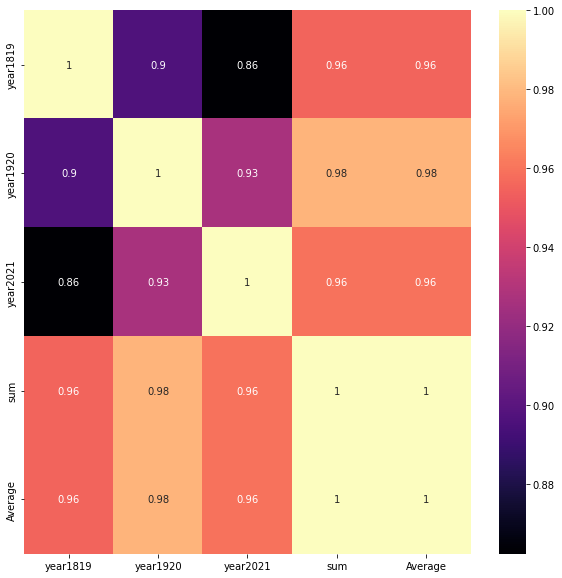

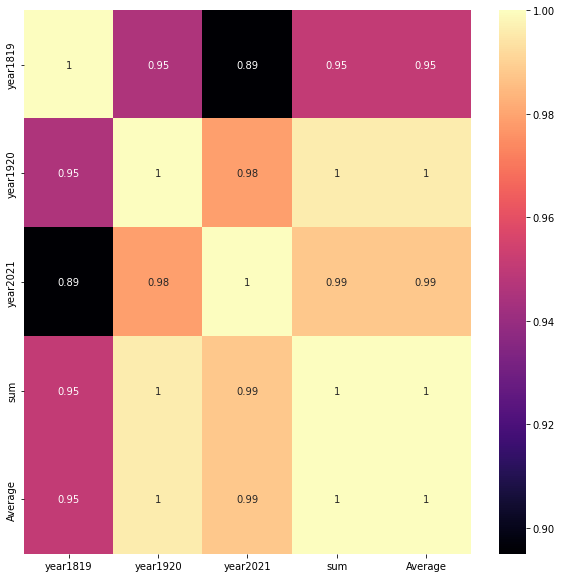

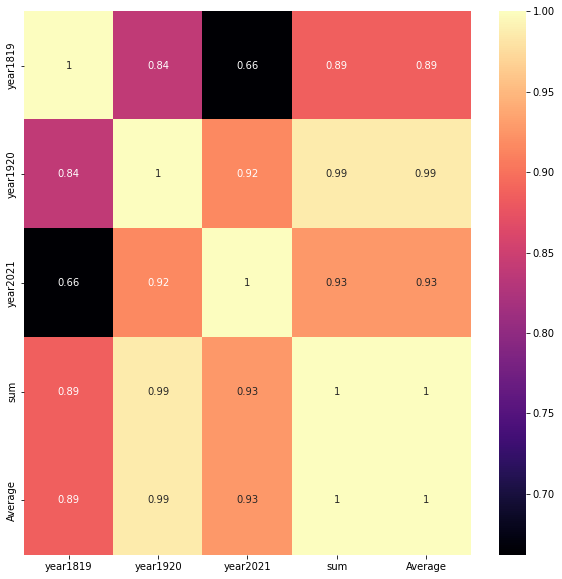

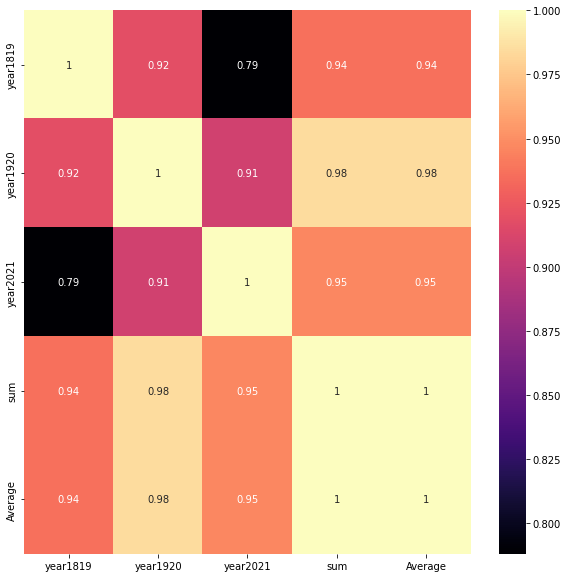

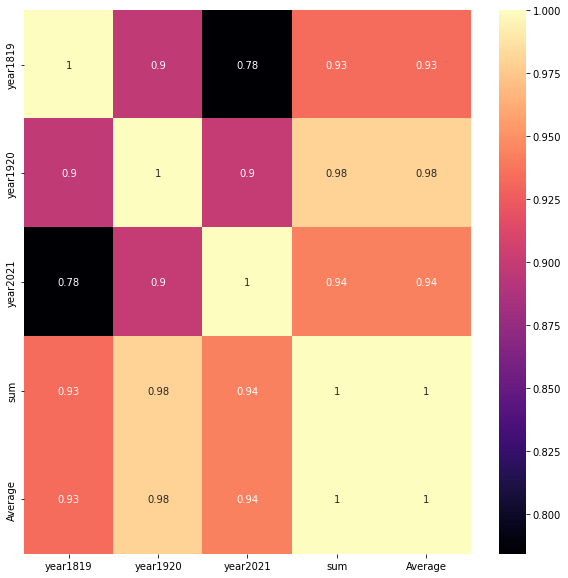

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_N[['year1819', 'year1920', 'year2021', 'sum', 'Average']].corr(), annot = True, cmap = 'magma')
plt.figure(figsize = (10,10))
sns.heatmap(df_E[['year1819', 'year1920', 'year2021', 'sum', 'Average']].corr(), annot = True, cmap = 'magma')
plt.figure(figsize = (10,10))
sns.heatmap(df_W[['year1819', 'year1920', 'year2021', 'sum', 'Average']].corr(), annot = True, cmap = 'magma')
plt.figure(figsize = (10,10))
sns.heatmap(df_S[['year1819', 'year1920', 'year2021', 'sum', 'Average']].corr(), annot = True, cmap = 'magma')
plt.figure(figsize = (10,10))
sns.heatmap(df[['year1819', 'year1920', 'year2021', 'sum', 'Average']].corr(), annot = True, cmap = 'magma')

8

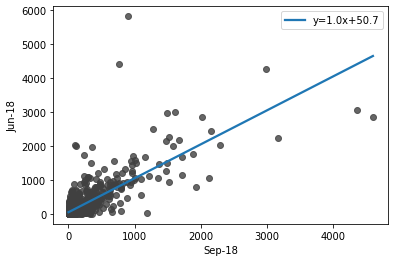

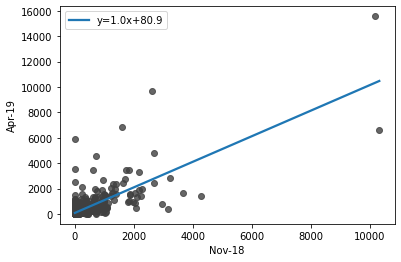

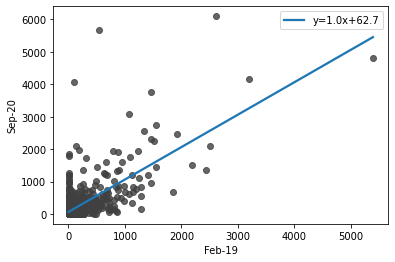

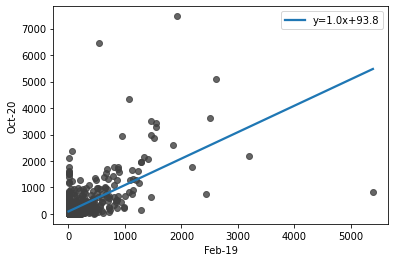

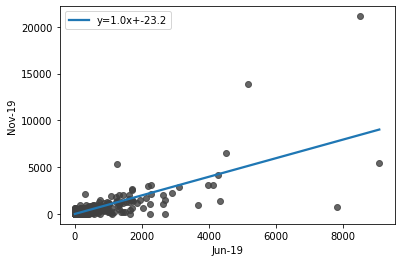

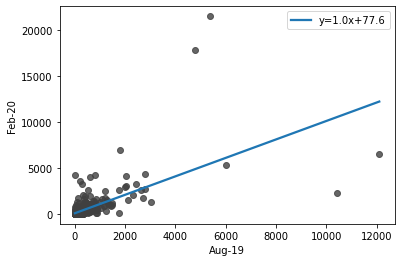

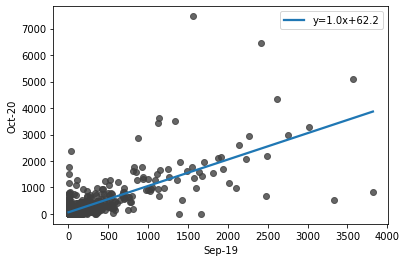

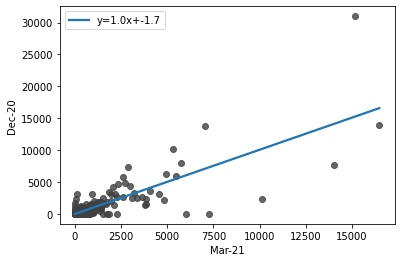

In [ ]:
from scipy import stats
count = 0
for i in ['Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19',
       'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19',
       'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
       'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21',
       'year1819', 'year1920', 'year2021', 'sum', 'Average']:
  for j in ['Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19',
       'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19',
       'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
       'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21',
       'year1819', 'year1920', 'year2021', 'sum', 'Average']:
    if(j!=i):
      slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
      if(slope>=0.99 and slope<=1.01 and intercept<=100):
        plt.figure()
        ax = sns.regplot(x=i, y=j, data=df, ci=None, scatter_kws=dict(color='0.25'), line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
        ax.legend()
        count+=1
count

---